In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import numpy.polynomial.polynomial as poly
from qutip import *

# System

In [55]:
N = 20

In [56]:
#Parameters
h_bar=1
w_0=1
w_p = 0.5  #around w_0
kappa=0.1
gamma=0.1
K = -0.1
F = 0.05

In [57]:
a= destroy(N)

In [58]:
#Hamiltonian
H=w_0*a.dag()*a + h_bar*K/2*a.dag()*a.dag()*a*a + F*(a+a.dag())

In [59]:
#Jump Operators
c_ops = []
c0 = np.sqrt(gamma) *a
c_ops.append(c0)

In [60]:
psi0 = basis(N,10)

In [61]:
tlist = np.linspace(0,100,100)

In [62]:
me = mesolve(H, psi0,tlist,c_ops,[a.dag()*a])

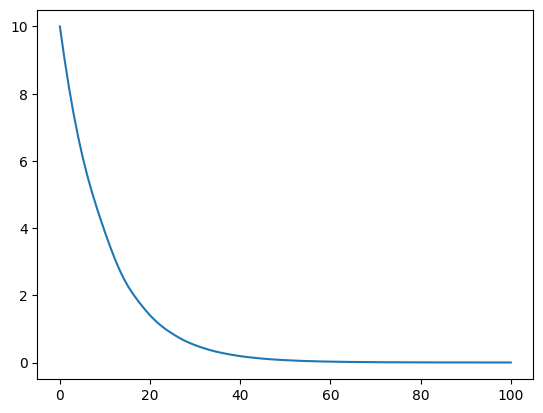

In [63]:
plt.plot(tlist,me.expect[0])

# Semi-Classical treatment

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

Let's begin by simulating a sigle cavity

In [4]:
#parameters
w_0 = 1                     # resonance frequency of the cavity
w_p = np.linspace(0,2, 1500) # pump frequency
kappa=0.2                   # internal losses
gamma=0.1                   # external coumpling
K = -0.5                    # Kerr non-linearity
F = 0.05

In [5]:
ksi_crit = -1./np.sqrt(27)

In [6]:
deltas = 1./(kappa + gamma)*(w_p-w_0)
ksis = np.array([0.01,0.5,1,2])*ksi_crit

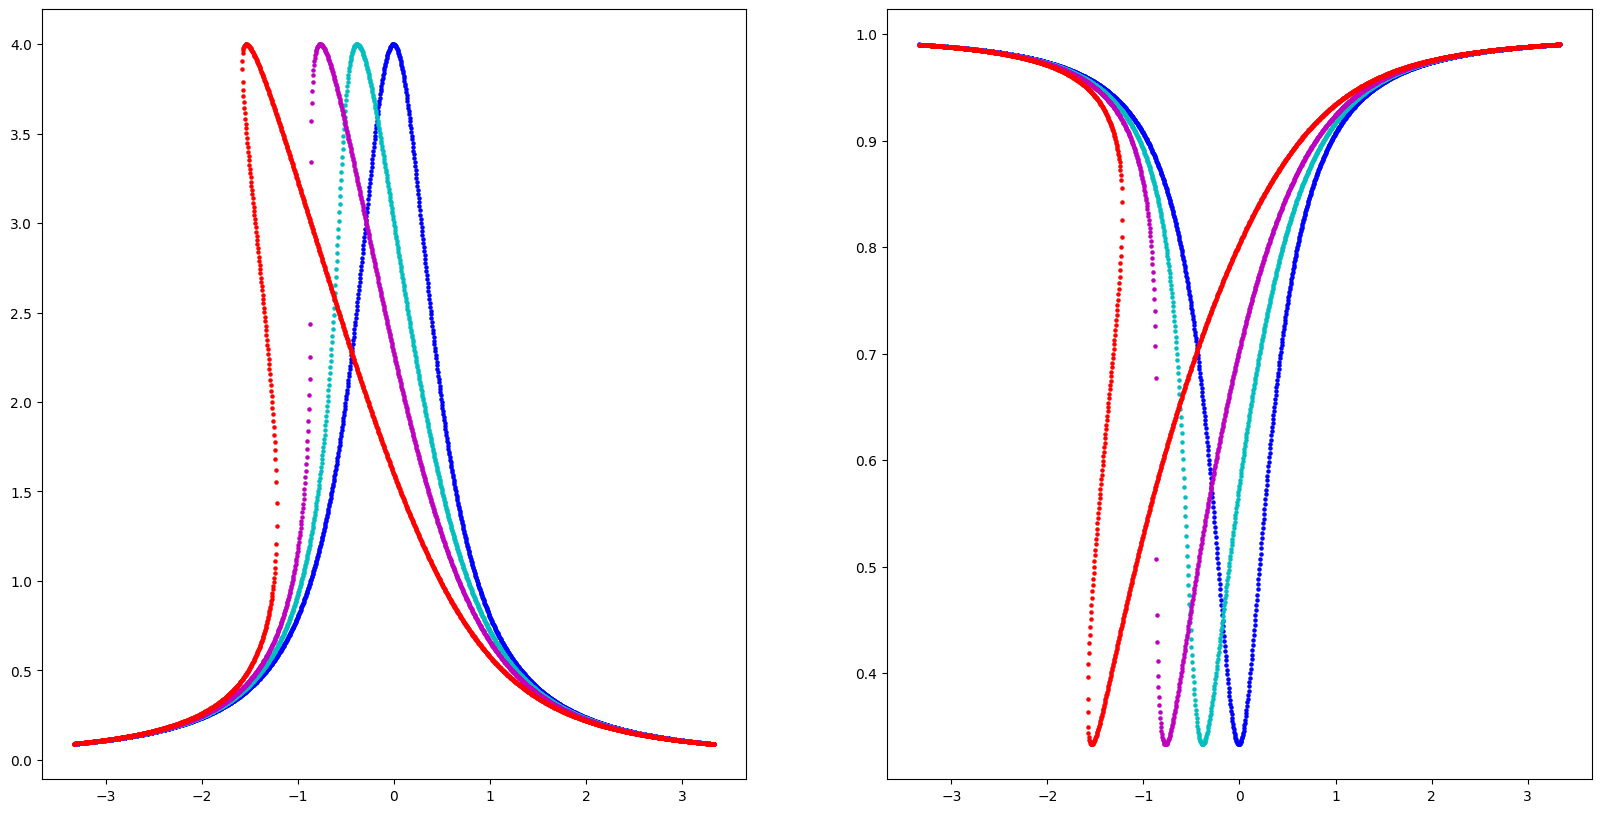

In [7]:
col = np.array(['b','c','m','r'])
fig,ax = plt.subplots(ncols=2, figsize=(20,10))
for i, ksi in enumerate(ksis):
    dcpy = np.array([])
    n = np.array([])
    G = np.array([])
    for delta in deltas:
        coeff=[ksi**2,-2*delta*ksi,delta**2 +.25, -1]
        sol = np.roots(coeff)
        sol = np.real(sol[np.isreal(sol)])
        
        dcpy = np.concatenate((dcpy, np.ones(len(sol)) * delta))
        n = np.concatenate((n, sol)) 
        G = np.concatenate((G, np.abs(kappa/(kappa+gamma) * 1./(.5-1j*delta + 1j*ksi*sol) -1)))

    ax[0].scatter(dcpy,n, s=5, c = col[i])
    ax[1].scatter(dcpy,G, s=5, c = col[i])


# Dimer

In [8]:
# Global parameters
k = 0.01 # internal couplings
g = 0.02 # external losses
J = 0.1  # cavity coupling

npts = 150

In [70]:
def rhs_left(s, a, dl, dr, k, g, Ul, Ur, F): 
    return [1j*(dl + 1j*k/2)*a[0]-1j*J*a[1]-1j*Ul*np.abs(a[0])**2 * a[0] + F,1j*(dr + 1j*g/2)*a[1]-1j*J*a[0]-1j*Ur*np.abs(a[1])**2 * a[1]]

In [71]:
def rhs_right(s, a, dl, dr, k, g, Ul, Ur, F): 
    return [1j*(dl + 1j*k/2)*a[0]-1j*J*a[1]-1j*Ul*np.abs(a[0])**2 * a[0] ,1j*(dr + 1j*g/2)*a[1]-1j*J*a[0]-1j*Ur*np.abs(a[1])**2 * a[1]+ F]

## $U_l = U_r$

In [72]:
# Kerr non-linearity
Ul = 0.1
Ur = 0.1

### $\omega_l = \omega_r$

In [73]:
#Parameters
w_l = 1.5
w_r = 1.5
w_p = np.linspace(1.2,1.8,npts)
F= 0.0005

#### Cavity fields
On the left the modulus squared of the left and right cavity fields are shown while a drive on the left cavity is applied 

On the right the modulus squared of the left and right cavity fields are shown while a drive on the right cavity is applied

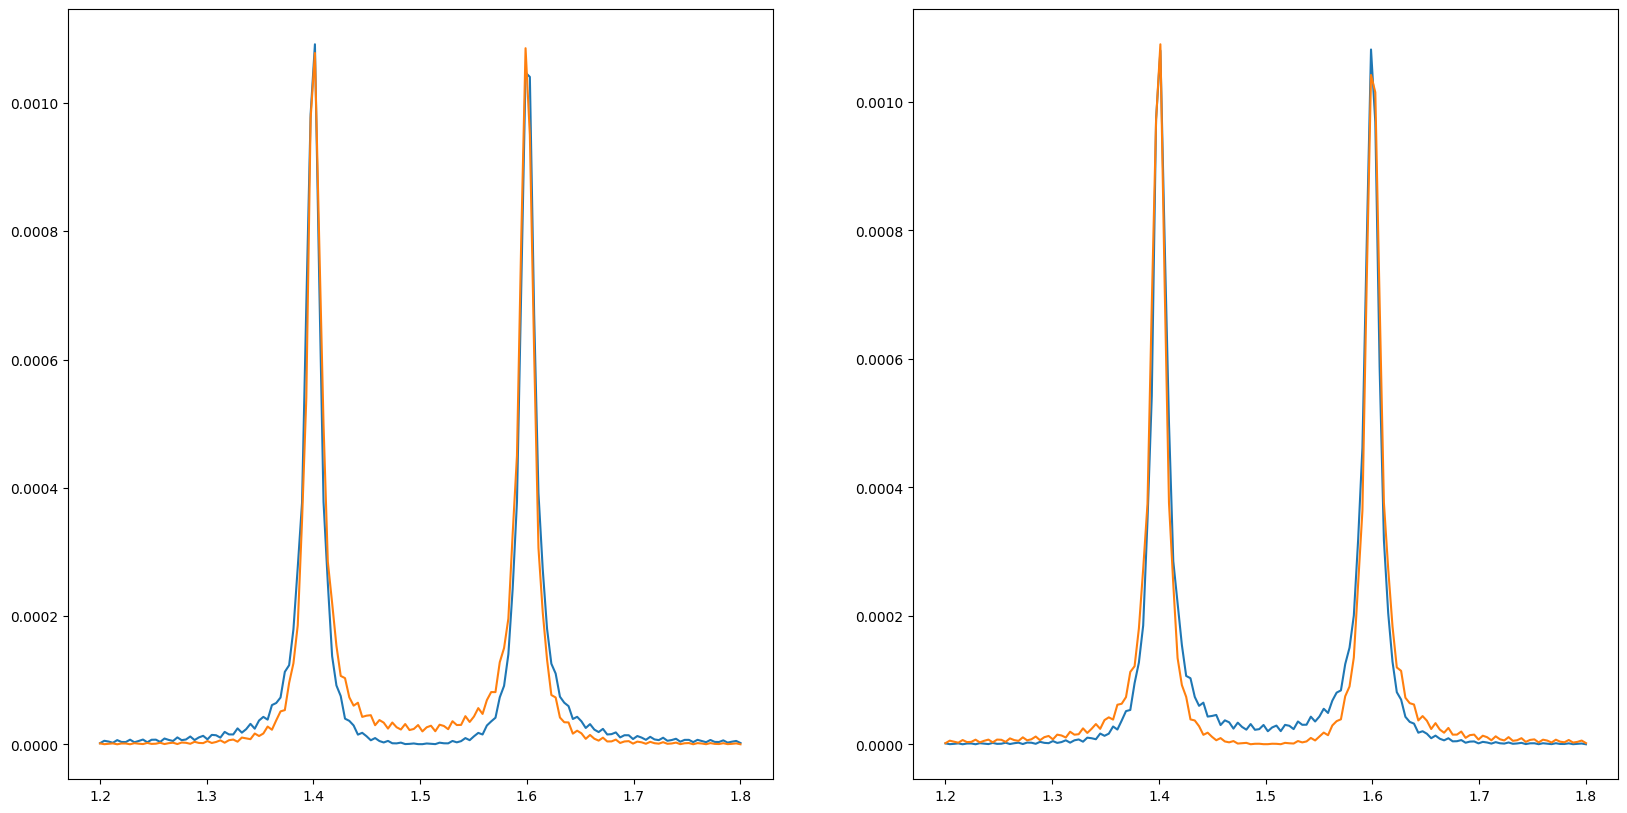

In [74]:
al_l = np.array([])
ar_l = np.array([])
al_r = np.array([])
ar_r = np.array([])

fig, ax = plt.subplots(ncols=2, figsize = (20,10))
for wp in w_p:
    dr = wp-w_r
    dl = wp-w_l
    res_l = solve_ivp(rhs_left, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, F))
    res_r = solve_ivp(rhs_right, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, F))

    al_l = np.append(al_l,res_l.y[0][-1])
    ar_l = np.append(ar_l,res_l.y[1][-1])
    al_r = np.append(al_r,res_r.y[0][-1])
    ar_r = np.append(ar_r,res_r.y[1][-1])
ax[0].plot(w_p,np.abs(al_l)**2)
ax[0].plot(w_p,np.abs(ar_l)**2)
ax[1].plot(w_p,np.abs(al_r)**2)
ax[1].plot(w_p,np.abs(ar_r)**2)
plt.show()

#### Changing the input power 

In [9]:
F = np.linspace(0.001,0.05,npts)

In [10]:
F[70]

0.024020134228187922

In [23]:
Z1_ld = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z2_ld = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z1_rd = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z2_rd = np.ndarray((len(w_p),len(F)), dtype ='complex' )
for i, f in enumerate(F):
    
    al_l = np.array([])
    ar_l = np.array([])
    al_r = np.array([])
    ar_r = np.array([])
    
    for wp in w_p:
        dr = wp-w_r
        dl = wp-w_l
        res_l = solve_ivp(rhs_left, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, f))
        res_r = solve_ivp(rhs_right, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, f))

        al_l = np.append(al_l,res_l.y[0][-1])
        ar_l = np.append(ar_l,res_l.y[1][-1])
        al_r = np.append(al_r,res_r.y[0][-1])
        ar_r = np.append(ar_r,res_r.y[1][-1])
    Z1_ld[:,i] = al_l
    Z2_ld[:,i] = ar_l
    Z1_rd[:,i] = al_r
    Z2_rd[:,i] = ar_r

In [76]:
file = np.load('data1.npz', allow_pickle=True)
file.files
Z1_ld = file['Z1_ld']
Z2_ld = file['Z2_ld']
Z1_rd = file['Z1_rd']
Z2_rd = file['Z2_rd']

#### Linecuts

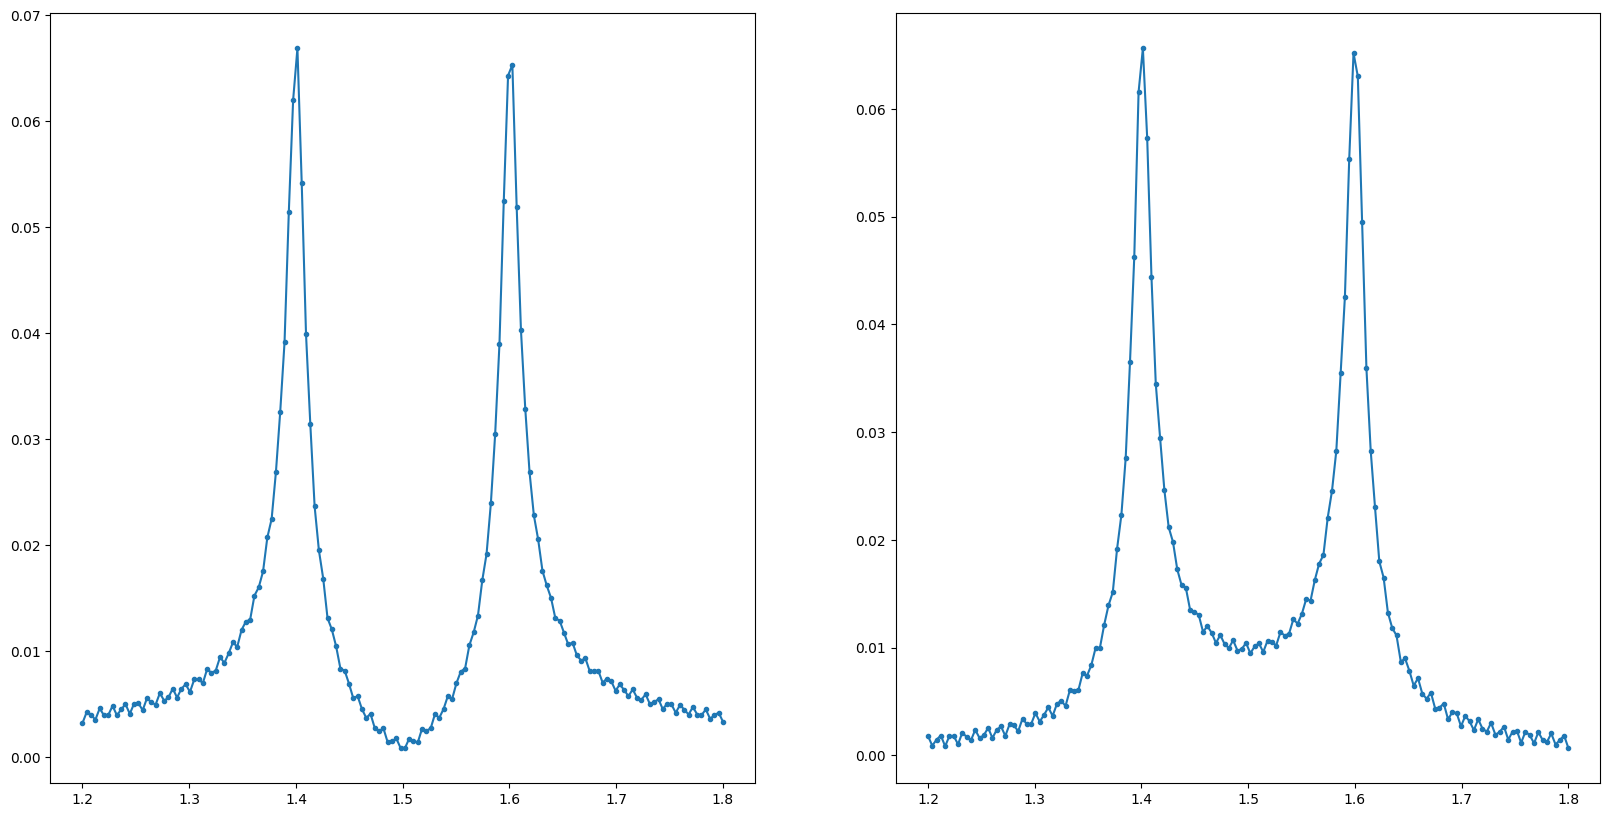

In [77]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
ax[0].plot(w_p,np.abs(Z1_ld[:,0]), '.-')
ax[1].plot(w_p,np.abs(Z2_ld[:,0]), '.-')
plt.show()

#### 2D plots

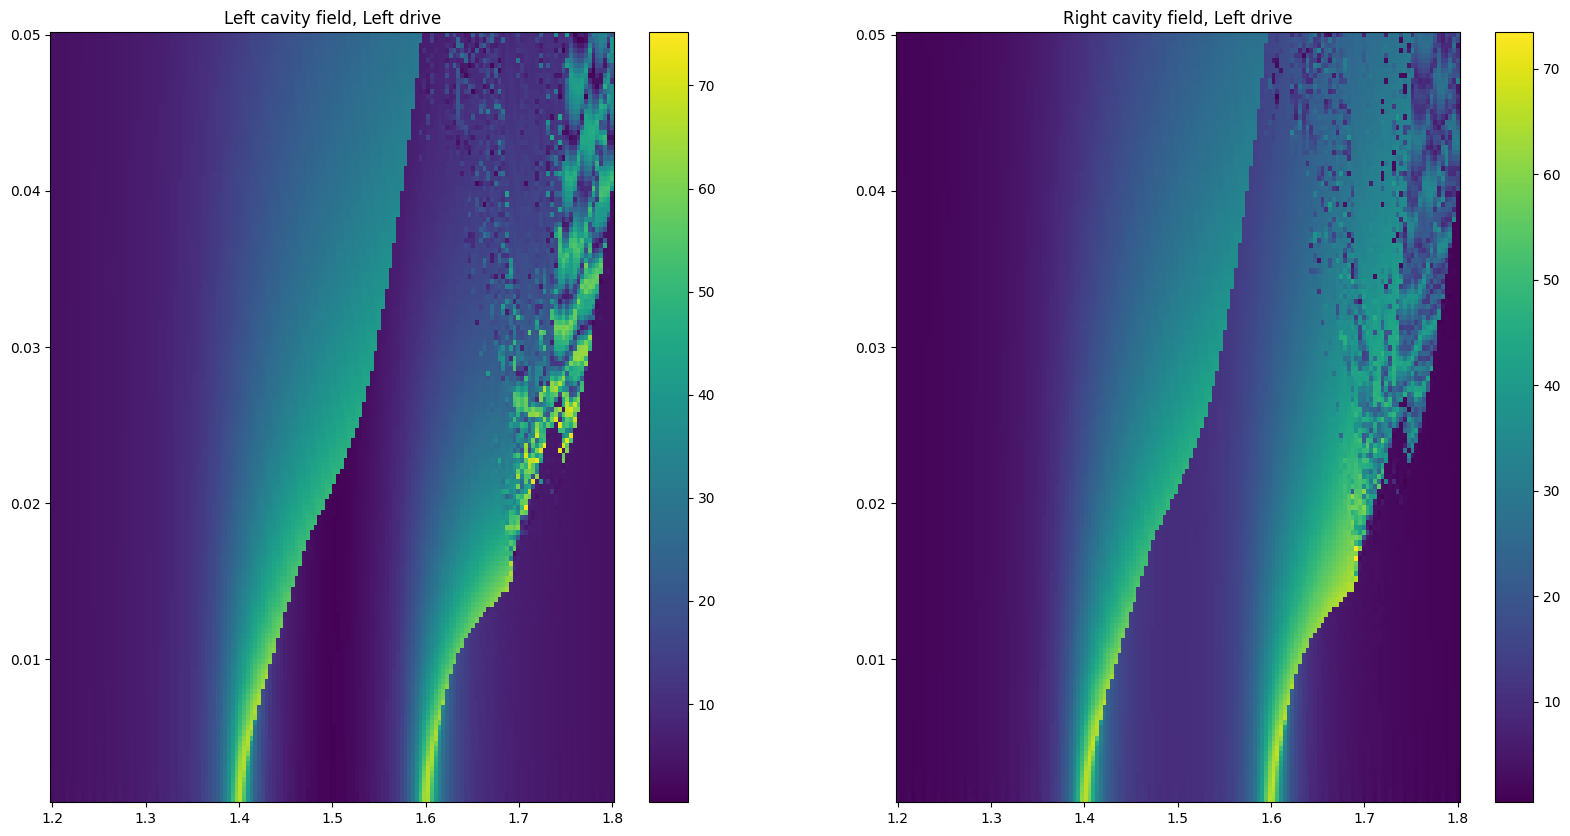

In [78]:
x,y = np.meshgrid(w_p,F, indexing = 'ij')
fig,ax = plt.subplots(ncols =2, figsize = (20,10))
im1 = ax[0].pcolormesh(x,y,np.abs(Z1_ld/F))
ax[0].set_title('Left cavity field, Left drive')
fig.colorbar(im1,ax=ax[0])
im2 = ax[1].pcolormesh(x,y,np.abs(Z2_ld/F))
fig.colorbar(im2,ax=ax[1])
ax[1].set_title('Right cavity field, Left drive')
plt.show()

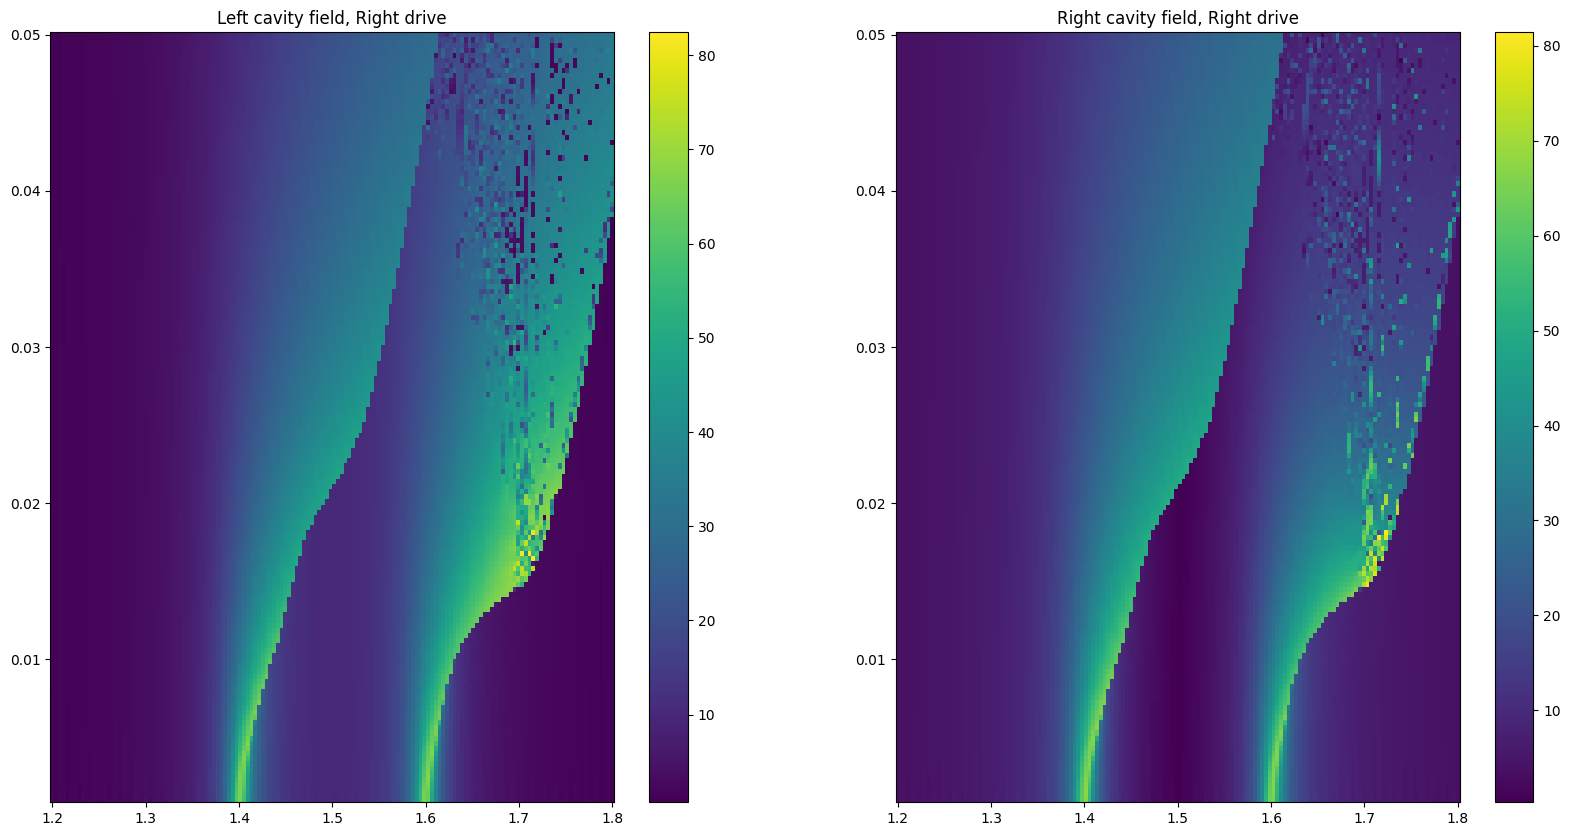

In [79]:
fig,ax = plt.subplots(ncols =2, figsize = (20,10))
im1 = ax[0].pcolormesh(x,y,np.abs(Z1_rd/F))
fig.colorbar(im1,ax=ax[0])
ax[0].set_title('Left cavity field, Right drive')
im2 = ax[1].pcolormesh(x,y,np.abs(Z2_rd/F))
fig.colorbar(im2,ax=ax[1])
ax[1].set_title('Right cavity field, Right drive')
plt.show()

In [65]:
np.savez('data1.npz', Z1_ld = Z1_ld,  Z2_ld = Z2_ld, Z1_rd = Z1_rd,  Z2_rd = Z2_rd)

### $\omega_l > \omega_r$

In [80]:
#Parameters
w_l = 1.6
w_r = 1.4
w_p = np.linspace(1.2,1.8,npts)
F= 0.0005

#### Cavity fields
On the left the modulus squared of the left and right cavity fields are shown while a drive on the left cavity is applied 

On the right the modulus squared of the left and right cavity fields are shown while a drive on the right cavity is applied

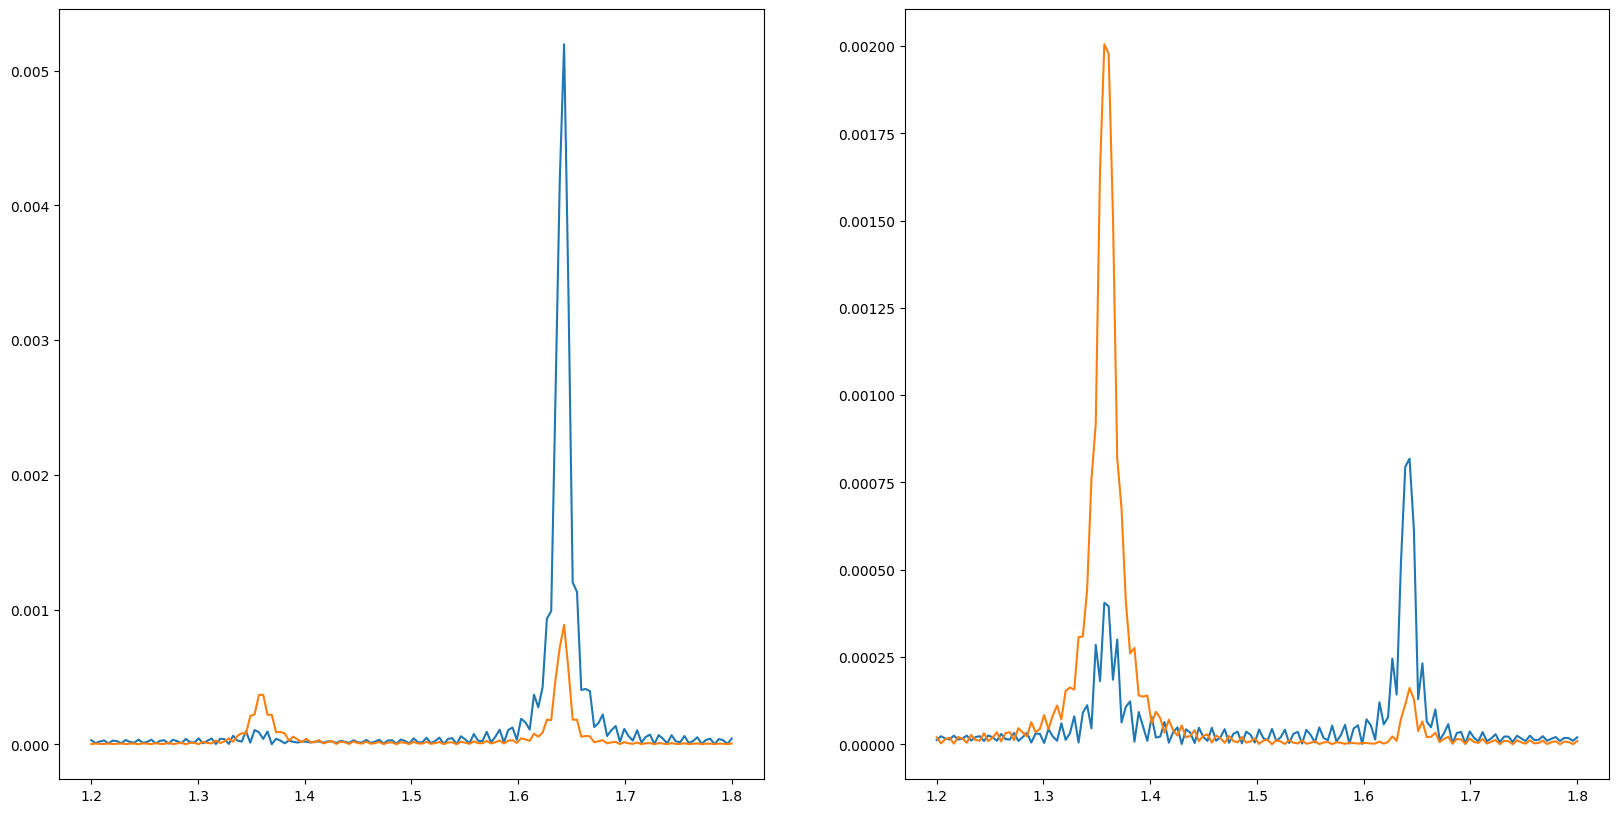

In [81]:
al_l = np.array([])
ar_l = np.array([])
al_r = np.array([])
ar_r = np.array([])

fig, ax = plt.subplots(ncols=2, figsize = (20,10))
for wp in w_p:
    dr = wp-w_r
    dl = wp-w_l
    res_l = solve_ivp(rhs_left, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, F))
    res_r = solve_ivp(rhs_right, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, F))

    al_l = np.append(al_l,res_l.y[0][-1])
    ar_l = np.append(ar_l,res_l.y[1][-1])
    al_r = np.append(al_r,res_r.y[0][-1])
    ar_r = np.append(ar_r,res_r.y[1][-1])
ax[0].plot(w_p,np.abs(al_l)**2)
ax[0].plot(w_p,np.abs(ar_l)**2)
ax[1].plot(w_p,np.abs(al_r)**2)
ax[1].plot(w_p,np.abs(ar_r)**2)
plt.show()

#### Changing the input power 

In [3]:
F = np.linspace(0.001,0.05,npts)

NameError: name 'npts' is not defined

In [30]:
Z3_ld = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z4_ld = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z3_rd = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z4_rd = np.ndarray((len(w_p),len(F)), dtype ='complex' )
for i, f in enumerate(F):
    
    al_l = np.array([])
    ar_l = np.array([])
    al_r = np.array([])
    ar_r = np.array([])
    
    for wp in w_p:
        dr = wp-w_r
        dl = wp-w_l
        res_l = solve_ivp(rhs_left, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, f))
        res_r = solve_ivp(rhs_right, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, f))

        al_l = np.append(al_l,res_l.y[0][-1])
        ar_l = np.append(ar_l,res_l.y[1][-1])
        al_r = np.append(al_r,res_r.y[0][-1])
        ar_r = np.append(ar_r,res_r.y[1][-1])
    Z3_ld[:,i] = al_l
    Z4_ld[:,i] = ar_l
    Z3_rd[:,i] = al_r
    Z4_rd[:,i] = ar_r

In [83]:
file = np.load('data2.npz', allow_pickle=True)
file.files
Z3_ld = file['Z3_ld']
Z4_ld = file['Z4_ld']
Z3_rd = file['Z3_rd']
Z4_rd = file['Z4_rd']

#### Linecuts

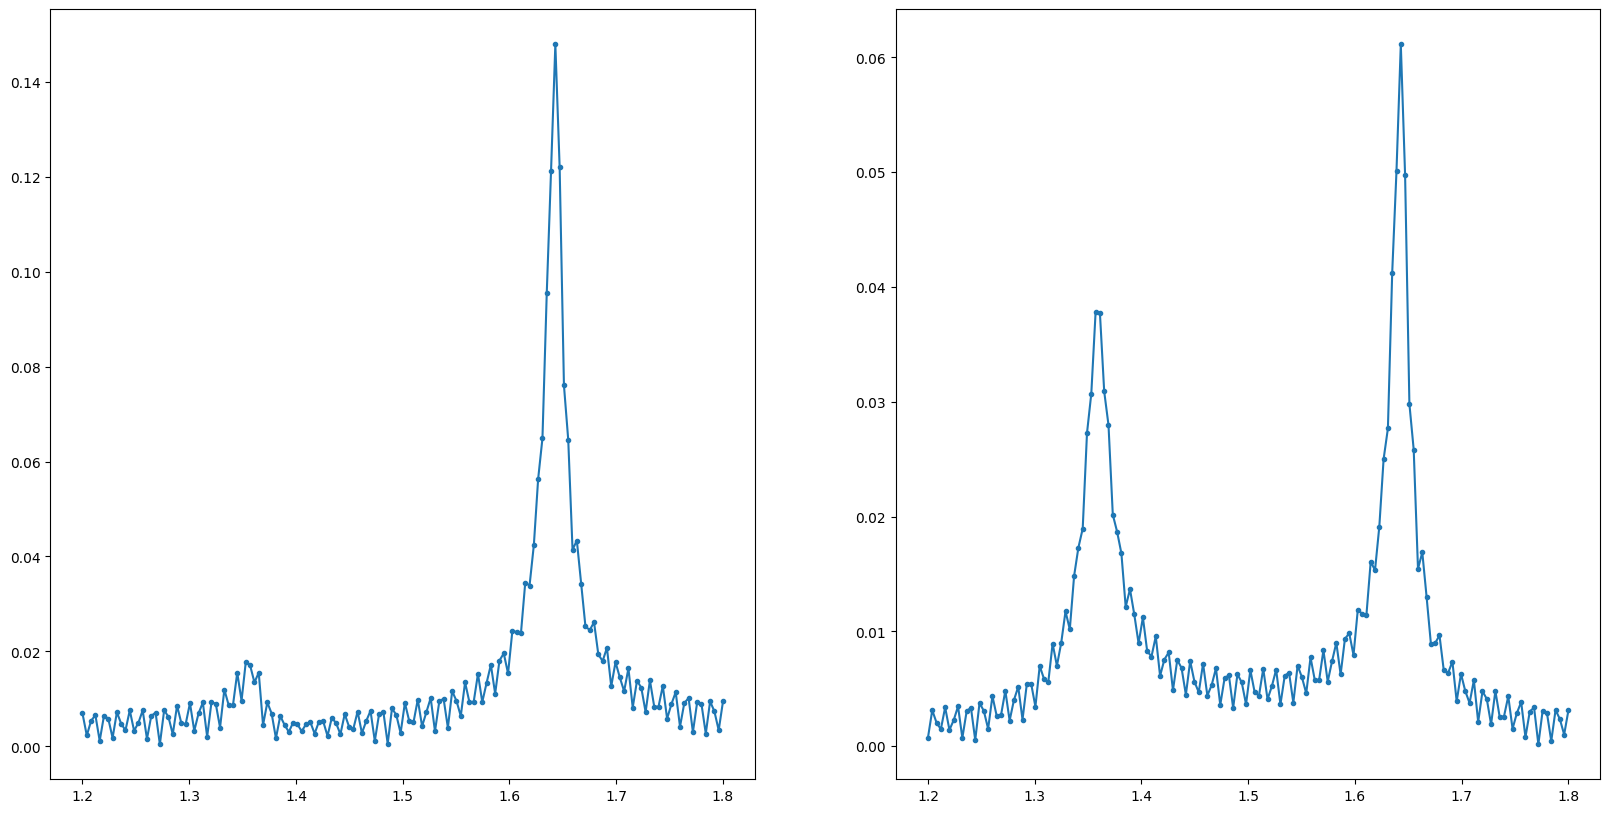

In [84]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
ax[0].plot(w_p,np.abs(Z3_ld[:,0]), '.-')
ax[1].plot(w_p,np.abs(Z4_ld[:,0]), '.-')
plt.show()

#### 2D plots

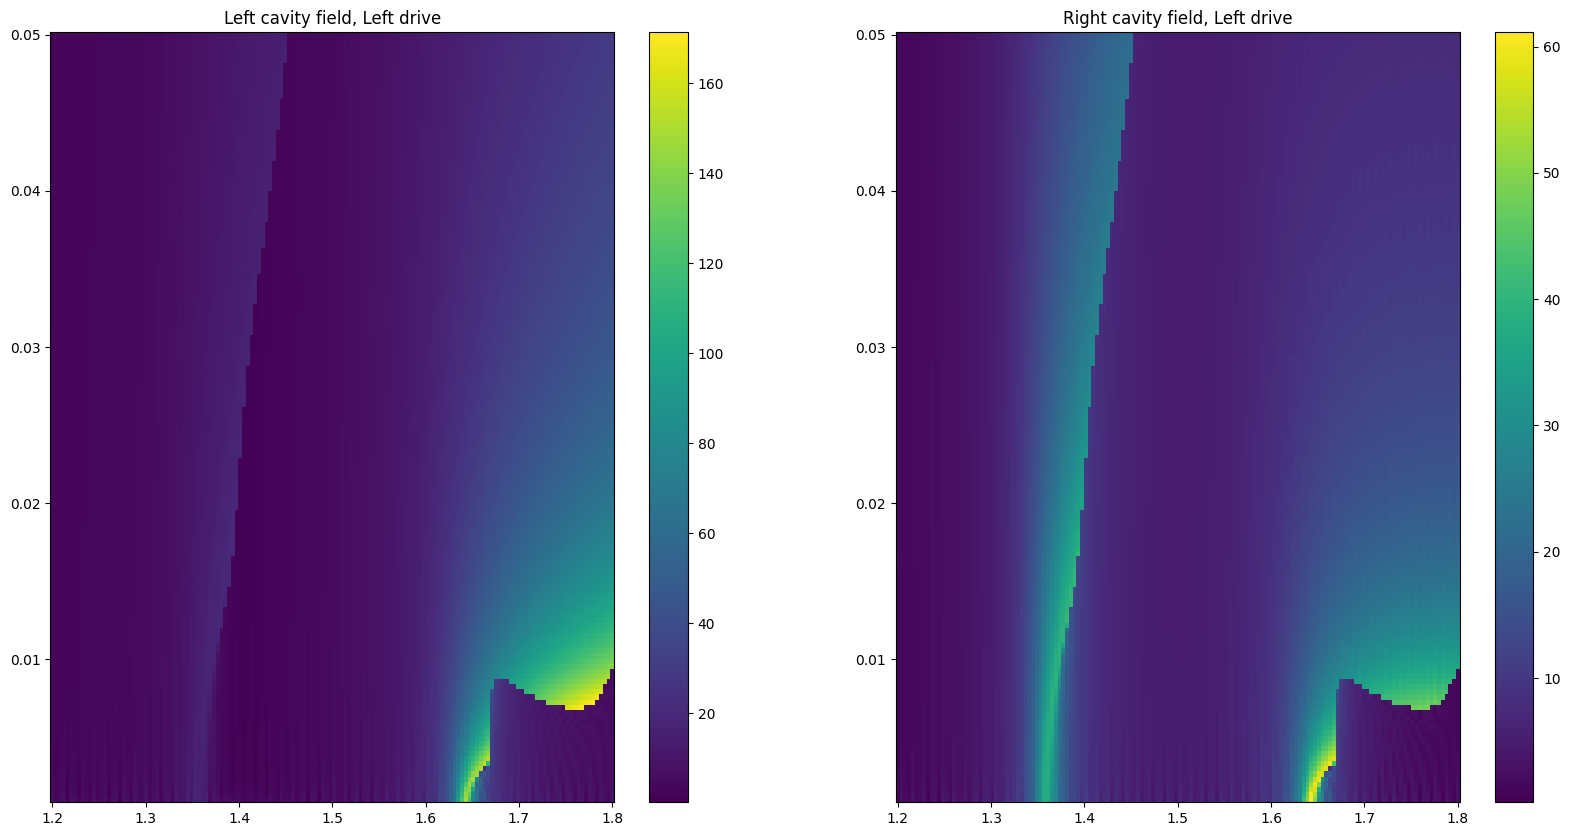

In [85]:
x,y = np.meshgrid(w_p,F, indexing = 'ij')
fig,ax = plt.subplots(ncols =2, figsize = (20,10))
im1 = ax[0].pcolormesh(x,y,np.abs(Z3_ld/F))
ax[0].set_title('Left cavity field, Left drive')
fig.colorbar(im1,ax=ax[0])
im2 = ax[1].pcolormesh(x,y,np.abs(Z4_ld/F))
fig.colorbar(im2,ax=ax[1])
ax[1].set_title('Right cavity field, Left drive')
plt.show()

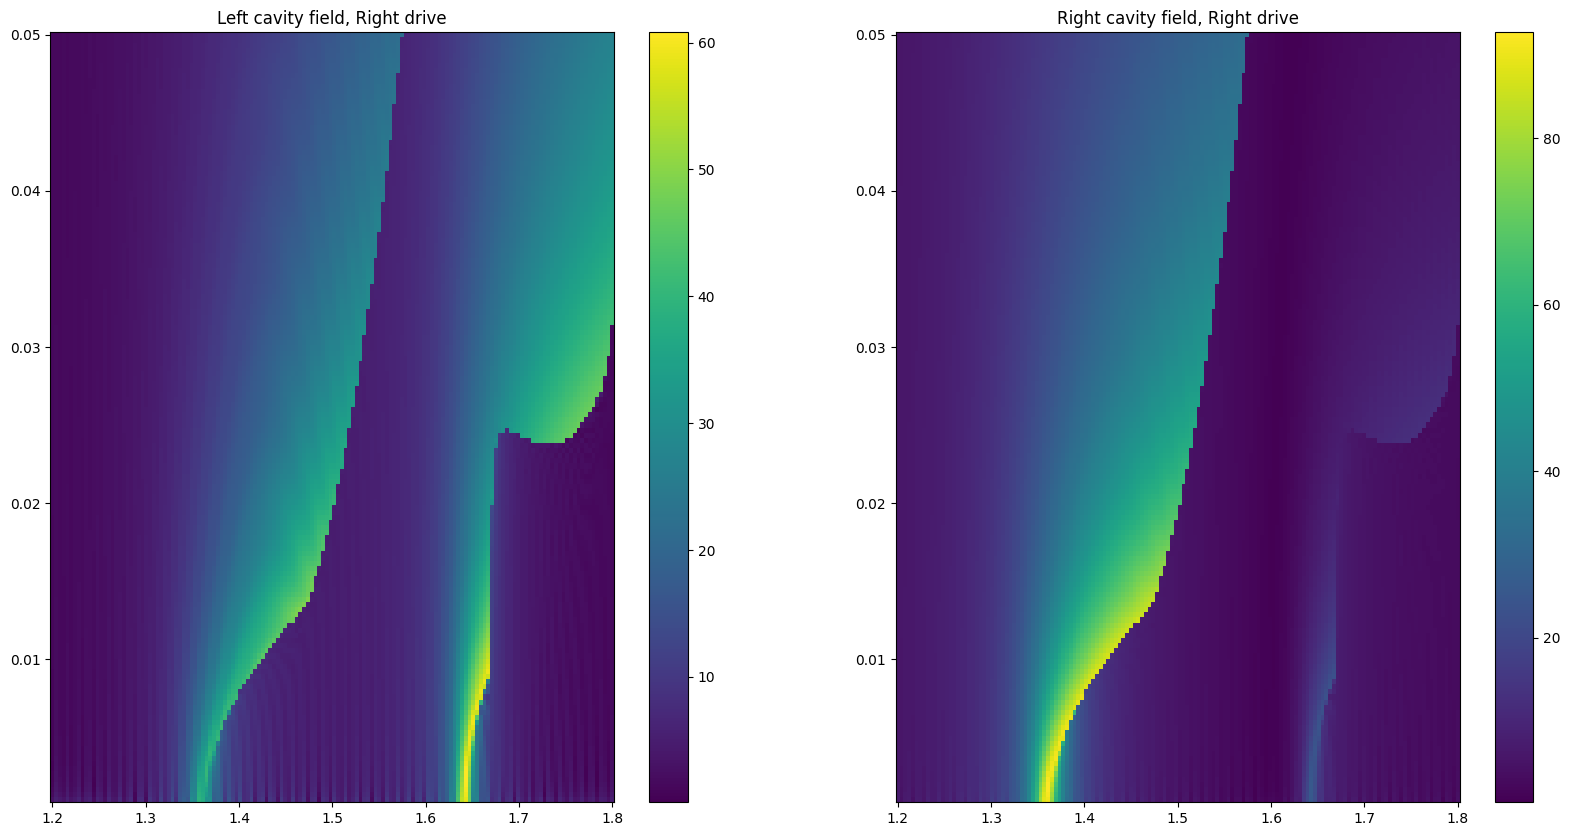

In [86]:
fig,ax = plt.subplots(ncols =2, figsize = (20,10))
im1 = ax[0].pcolormesh(x,y,np.abs(Z3_rd/F))
fig.colorbar(im1,ax=ax[0])
ax[0].set_title('Left cavity field, Right drive')
im2 = ax[1].pcolormesh(x,y,np.abs(Z4_rd/F))
fig.colorbar(im2,ax=ax[1])
ax[1].set_title('Right cavity field, Right drive')
plt.show()

In [68]:
np.savez('data2.npz', Z3_ld = Z3_ld,  Z4_ld = Z4_ld, Z3_rd = Z3_rd,  Z4_rd = Z4_rd)

## $U_l = -U_r$

In [6]:
# Kerr non-linearity
Ul = 0.1
Ur = -0.1

### $\omega_l = \omega_r$

In [7]:
#Parameters
w_l = 1.5
w_r = 1.5
w_p = np.linspace(1.2,1.8,npts)
F= 0.0005

#### Cavity fields
On the left the modulus squared of the left and right cavity fields are shown while a drive on the left cavity is applied 

On the right the modulus squared of the left and right cavity fields are shown while a drive on the right cavity is applied

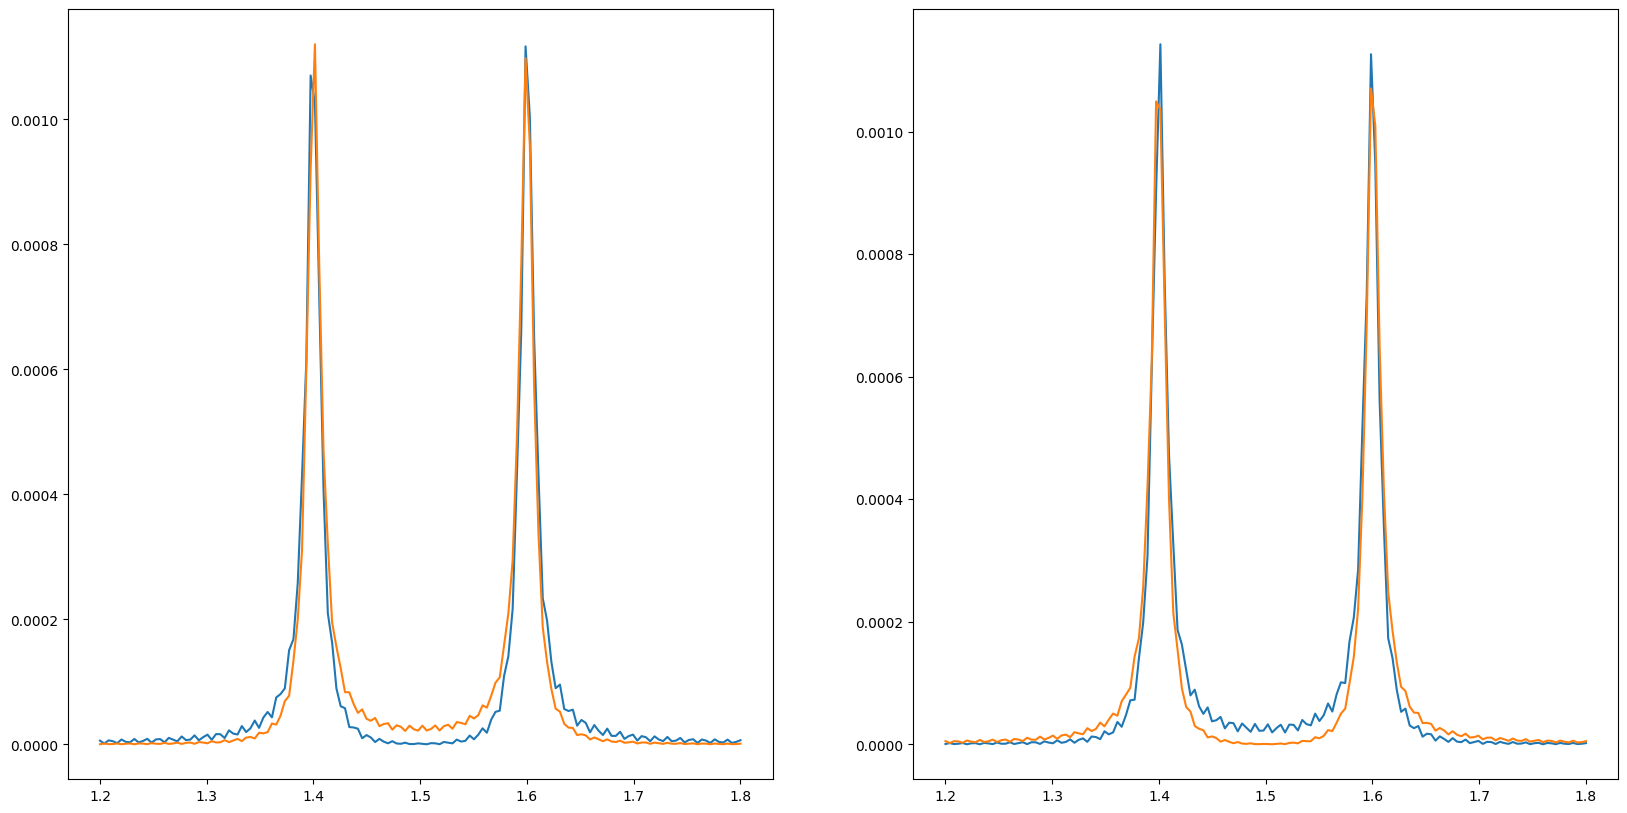

In [36]:
al_l = np.array([])
ar_l = np.array([])
al_r = np.array([])
ar_r = np.array([])

fig, ax = plt.subplots(ncols=2, figsize = (20,10))
for wp in w_p:
    dr = wp-w_r
    dl = wp-w_l
    res_l = solve_ivp(rhs_left, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, F))
    res_r = solve_ivp(rhs_right, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, F))

    al_l = np.append(al_l,res_l.y[0][-1])
    ar_l = np.append(ar_l,res_l.y[1][-1])
    al_r = np.append(al_r,res_r.y[0][-1])
    ar_r = np.append(ar_r,res_r.y[1][-1])
ax[0].plot(w_p,np.abs(al_l)**2)
ax[0].plot(w_p,np.abs(ar_l)**2)
ax[1].plot(w_p,np.abs(al_r)**2)
ax[1].plot(w_p,np.abs(ar_r)**2)
plt.show()

#### Changing the input power 

In [37]:
F = np.linspace(0.001,0.05,npts)

In [38]:
Z5_ld = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z6_ld = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z5_rd = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z6_rd = np.ndarray((len(w_p),len(F)), dtype ='complex' )
for i, f in enumerate(F):
    
    al_l = np.array([])
    ar_l = np.array([])
    al_r = np.array([])
    ar_r = np.array([])
    
    for wp in w_p:
        dr = wp-w_r
        dl = wp-w_l
        res_l = solve_ivp(rhs_left, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, f))
        res_r = solve_ivp(rhs_right, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, f))

        al_l = np.append(al_l,res_l.y[0][-1])
        ar_l = np.append(ar_l,res_l.y[1][-1])
        al_r = np.append(al_r,res_r.y[0][-1])
        ar_r = np.append(ar_r,res_r.y[1][-1])
    Z5_ld[:,i] = al_l
    Z6_ld[:,i] = ar_l
    Z5_rd[:,i] = al_r
    Z6_rd[:,i] = ar_r

In [38]:
file = np.load('data3.npz', allow_pickle=True)
file.files
Z5_ld = file['Z5_ld']
Z6_ld = file['Z6_ld']
Z5_rd = file['Z5_rd']
Z6_rd = file['Z6_rd']

#### Linecuts

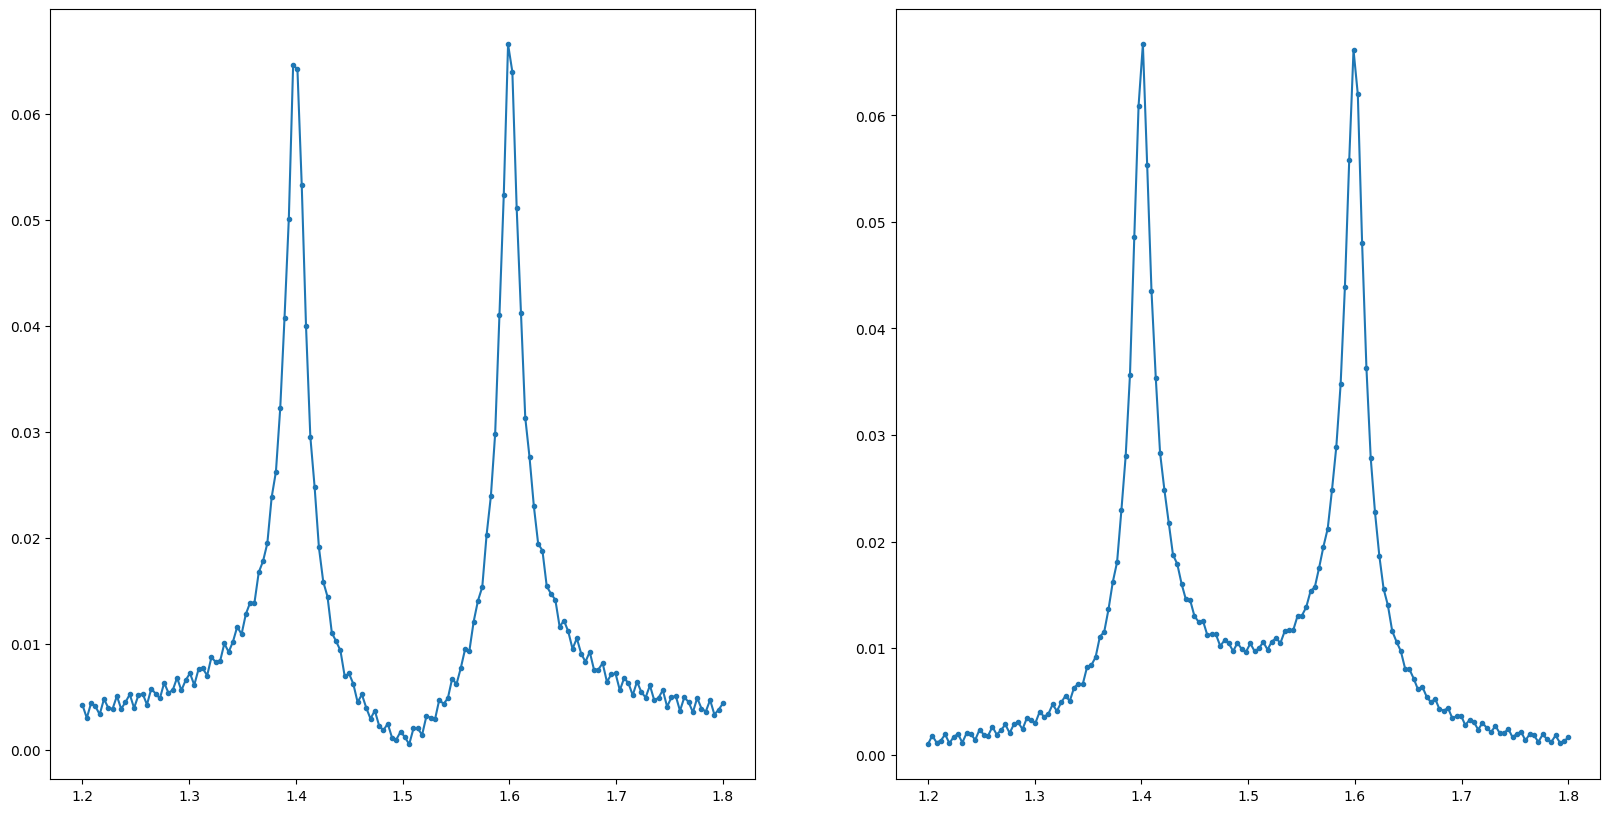

In [39]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
ax[0].plot(w_p,np.abs(Z5_ld[:,0]), '.-')
ax[1].plot(w_p,np.abs(Z6_ld[:,0]), '.-')
plt.show()

#### 2D plots

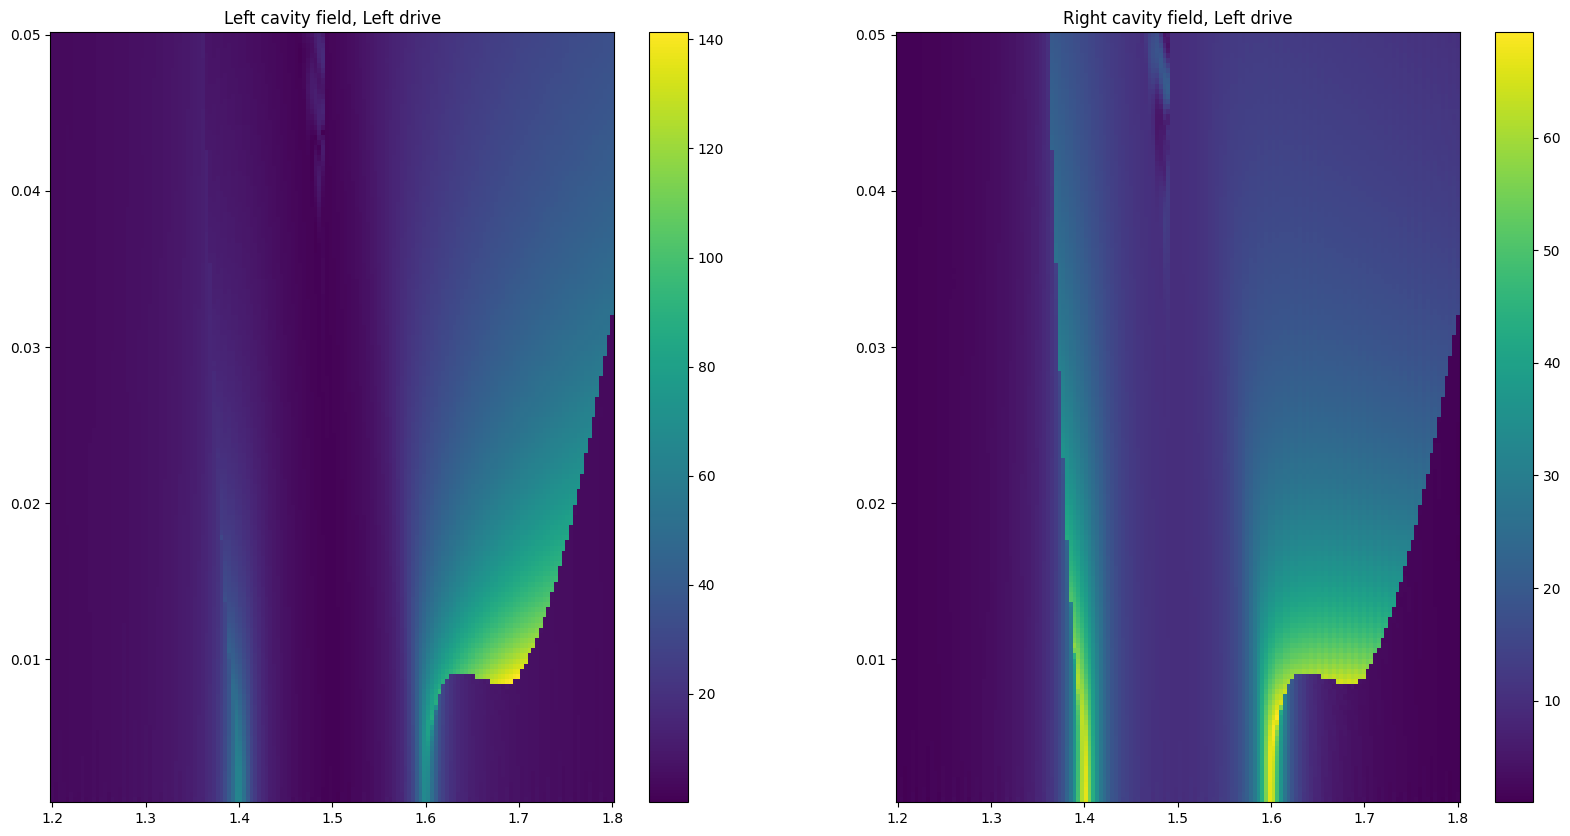

In [40]:
x,y = np.meshgrid(w_p,F, indexing = 'ij')
fig,ax = plt.subplots(ncols =2, figsize = (20,10))
im1 = ax[0].pcolormesh(x,y,np.abs(Z5_ld/F))
ax[0].set_title('Left cavity field, Left drive')
fig.colorbar(im1,ax=ax[0])
im2 = ax[1].pcolormesh(x,y,np.abs(Z6_ld/F))
fig.colorbar(im2,ax=ax[1])
ax[1].set_title('Right cavity field, Left drive')

plt.show()

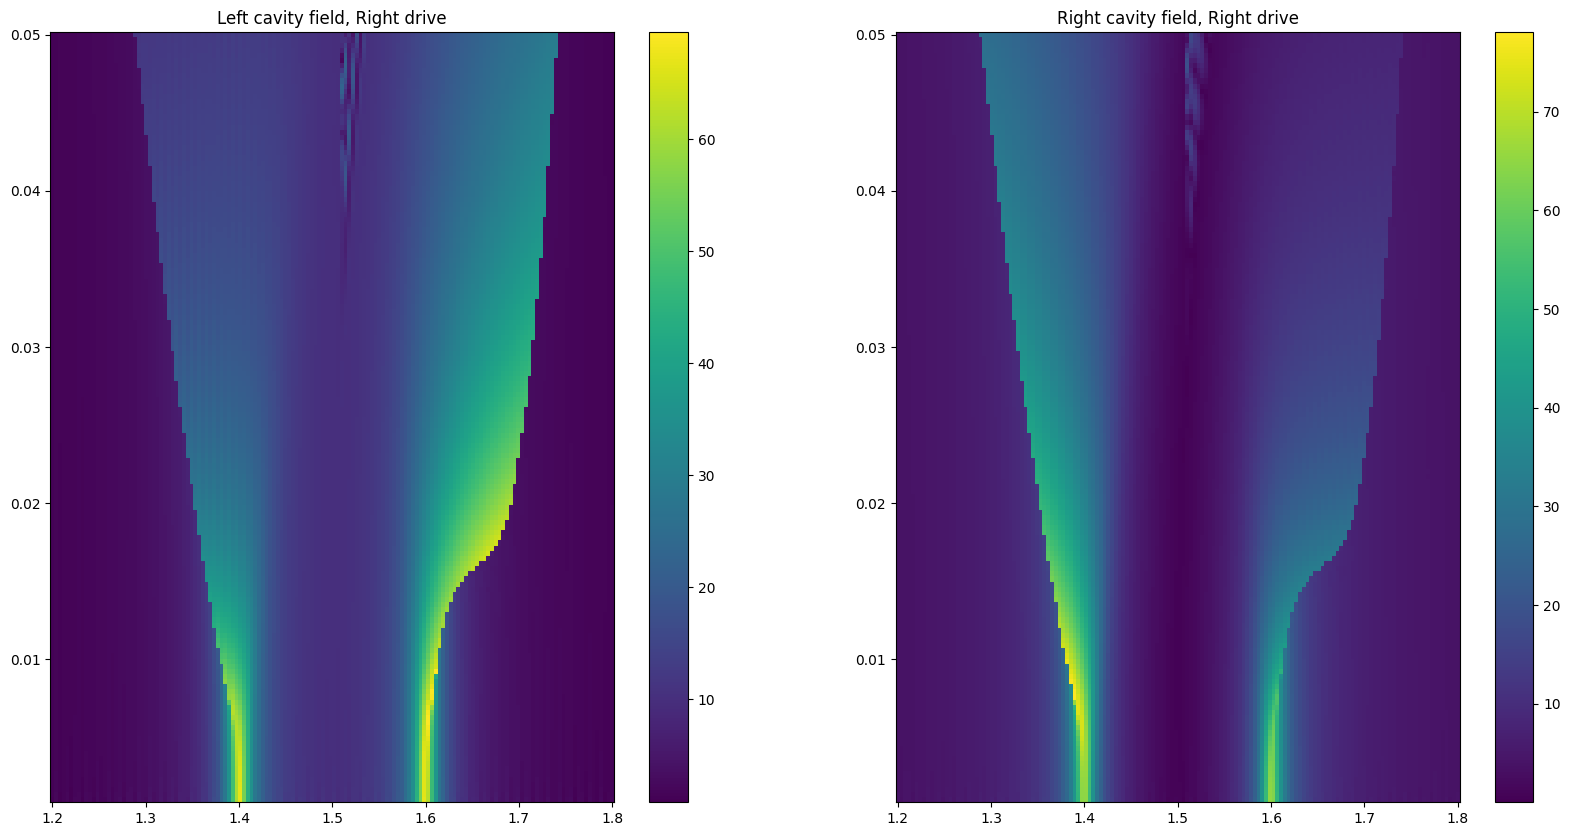

In [41]:
fig,ax = plt.subplots(ncols =2, figsize = (20,10))
im1 = ax[0].pcolormesh(x,y,np.abs(Z5_rd/F))
fig.colorbar(im1,ax=ax[0])
ax[0].set_title('Left cavity field, Right drive')
im2 = ax[1].pcolormesh(x,y,np.abs(Z6_rd/F))
fig.colorbar(im2,ax=ax[1])
ax[1].set_title('Right cavity field, Right drive')
plt.show()

In [ ]:
#Hysteresis?

In [69]:
np.savez('data3.npz', Z5_ld = Z5_ld,  Z6_ld = Z6_ld, Z5_rd = Z5_rd,  Z6_rd = Z6_rd)

### $\omega_l < \omega_r$


In [8]:
#Parameters
w_l = 1.4
w_r = 1.6
w_p = np.linspace(1.2,1.8,npts)
F= 0.0005

#### Cavity fields
On the left the modulus squared of the left and right cavity fields are shown while a drive on the left cavity is applied 

On the right the modulus squared of the left and right cavity fields are shown while a drive on the right cavity is applied

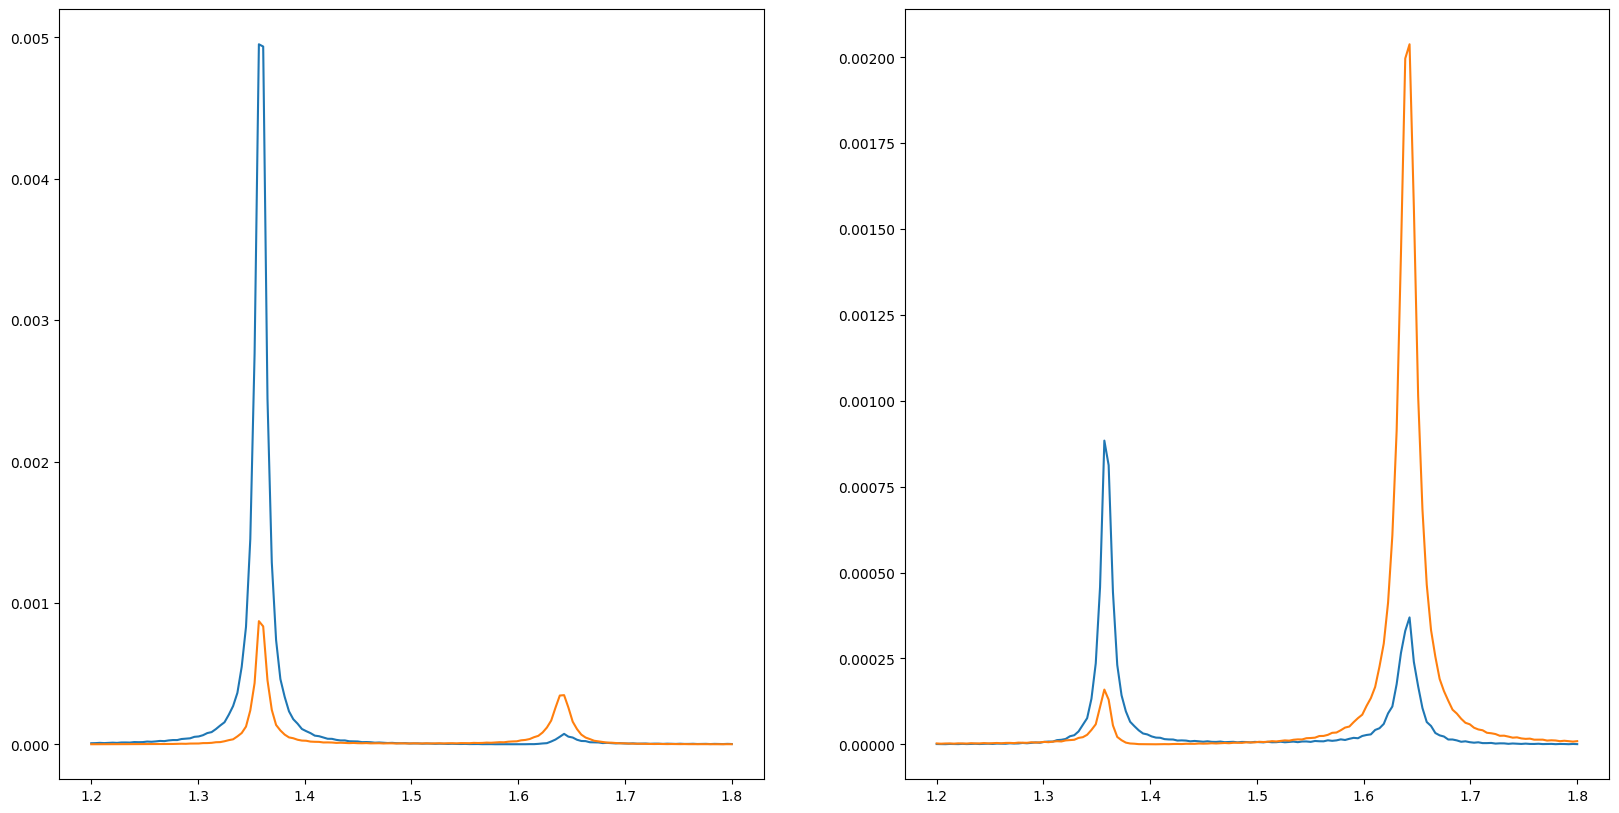

In [43]:
al_l = np.array([])
ar_l = np.array([])
al_r = np.array([])
ar_r = np.array([])

fig, ax = plt.subplots(ncols=2, figsize = (20,10))
for wp in w_p:
    dr = wp-w_r
    dl = wp-w_l
    res_l = solve_ivp(rhs_left, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, F))
    res_r = solve_ivp(rhs_right, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, F))

    al_l = np.append(al_l,res_l.y[0][-1])
    ar_l = np.append(ar_l,res_l.y[1][-1])
    al_r = np.append(al_r,res_r.y[0][-1])
    ar_r = np.append(ar_r,res_r.y[1][-1])
ax[0].plot(w_p,np.abs(al_l)**2)
ax[0].plot(w_p,np.abs(ar_l)**2)
ax[1].plot(w_p,np.abs(al_r)**2)
ax[1].plot(w_p,np.abs(ar_r)**2)
plt.show()

#### Changing the input power 

In [1]:
F = np.linspace(0.001,0.05,npts)

NameError: name 'np' is not defined

In [45]:
Z7_ld = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z8_ld = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z7_rd = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z8_rd = np.ndarray((len(w_p),len(F)), dtype ='complex' )
for i, f in enumerate(F):
    
    al_l = np.array([])
    ar_l = np.array([])
    al_r = np.array([])
    ar_r = np.array([])
    
    for wp in w_p:
        dr = wp-w_r
        dl = wp-w_l
        res_l = solve_ivp(rhs_left, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, f))
        res_r = solve_ivp(rhs_right, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, f))

        al_l = np.append(al_l,res_l.y[0][-1])
        ar_l = np.append(ar_l,res_l.y[1][-1])
        al_r = np.append(al_r,res_r.y[0][-1])
        ar_r = np.append(ar_r,res_r.y[1][-1])
    Z7_ld[:,i] = al_l
    Z8_ld[:,i] = ar_l
    Z7_rd[:,i] = al_r
    Z8_rd[:,i] = ar_r

In [9]:
file = np.load('data4.npz', allow_pickle=True)
file.files
Z7_ld = file['Z7_ld']
Z8_ld = file['Z8_ld']
Z7_rd = file['Z7_rd']
Z8_rd = file['Z8_rd']

In [23]:
Z7_ld.shape

(150, 150)

#### Linecuts

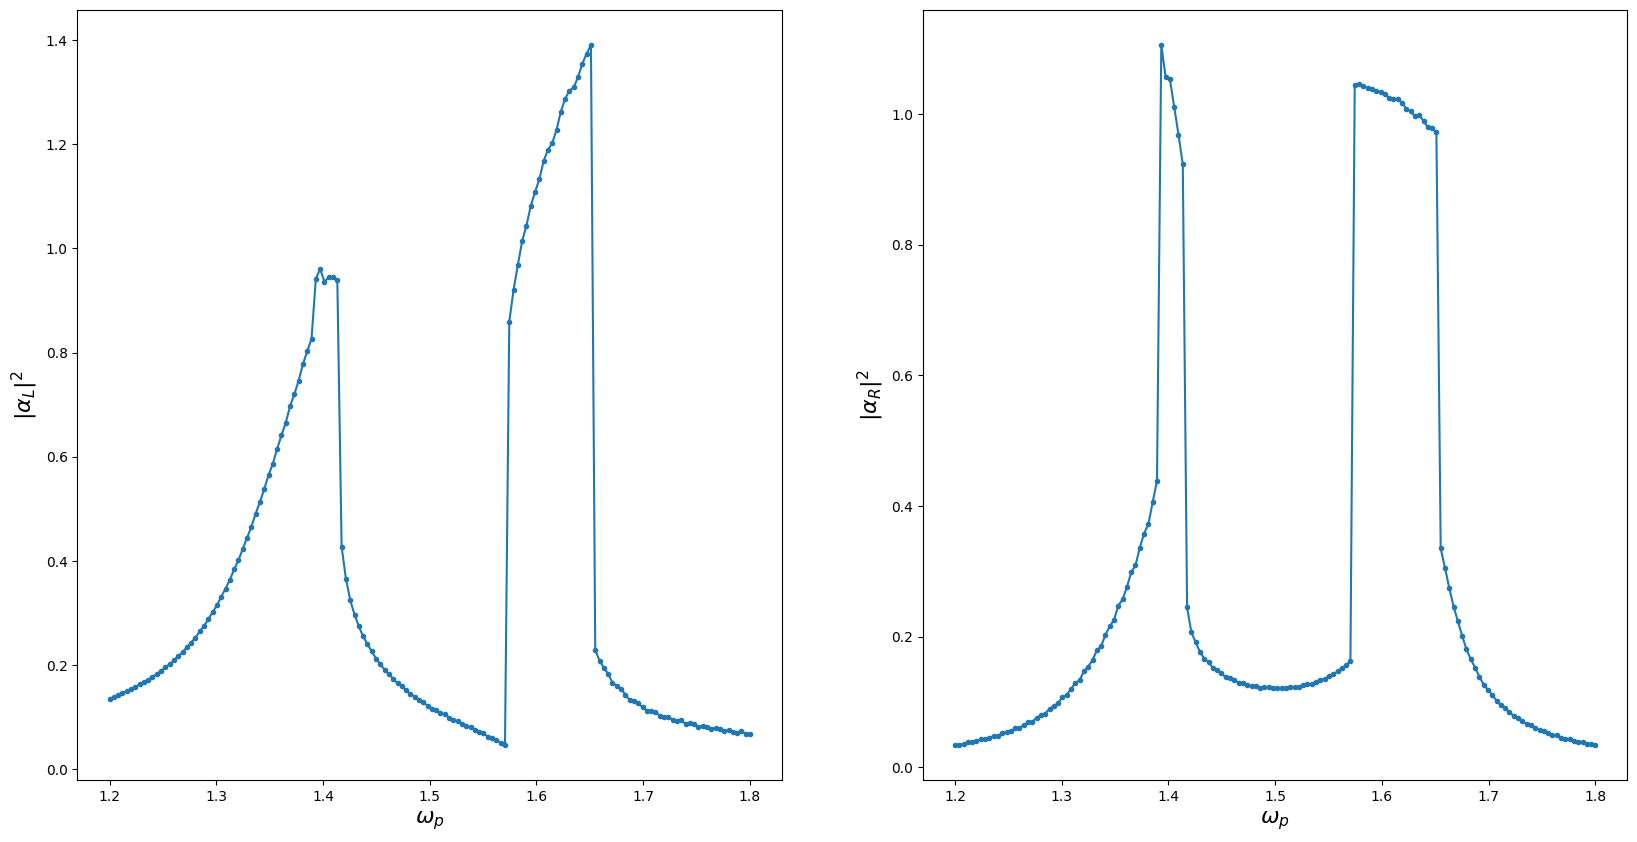

In [28]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
ax[0].plot(w_p,np.abs(Z7_ld[:,70]), '.-')
ax[1].plot(w_p,np.abs(Z8_ld[:,70]), '.-')
ax[0].set_xlabel(r'$\omega_p$', fontsize=16)
ax[1].set_xlabel(r'$\omega_p$', fontsize=16)
ax[0].set_ylabel(r'$\left| \alpha_L\right|^2$', fontsize=16)
ax[1].set_ylabel(r'$\left| \alpha_R\right|^2$', fontsize=16)

plt.show()

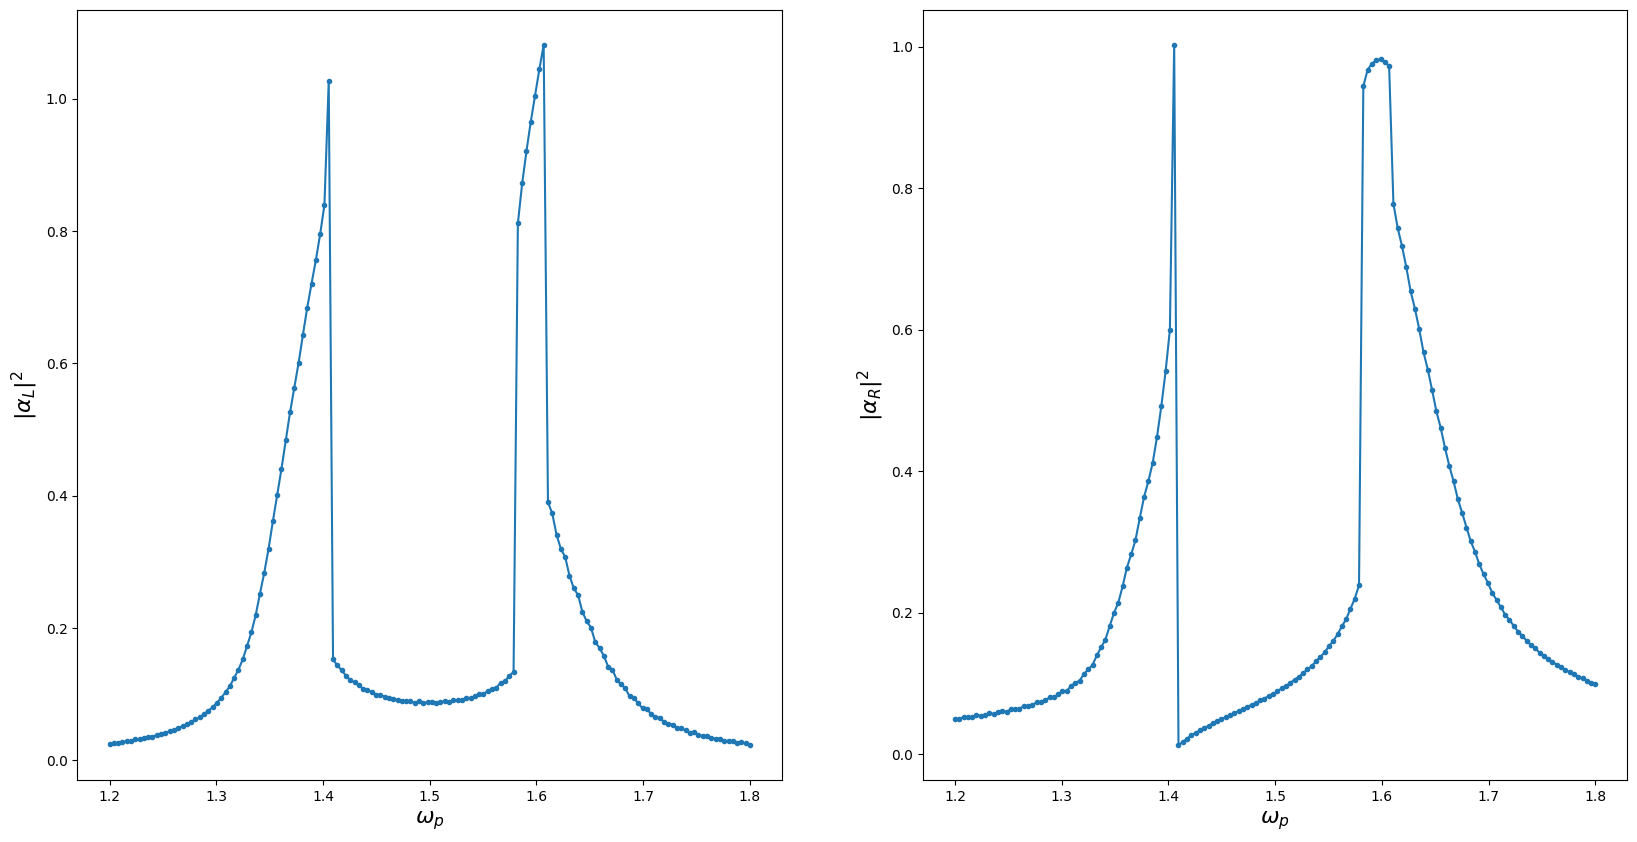

In [27]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
ax[0].plot(w_p,np.abs(Z7_rd[:,50]), '.-')
ax[1].plot(w_p,np.abs(Z8_rd[:,50]), '.-')
ax[0].set_xlabel(r'$\omega_p$', fontsize=16)
ax[1].set_xlabel(r'$\omega_p$', fontsize=16)
ax[0].set_ylabel(r'$\left| \alpha_L\right|^2$', fontsize=16)
ax[1].set_ylabel(r'$\left| \alpha_R\right|^2$', fontsize=16)

plt.show()

#### 2D plots

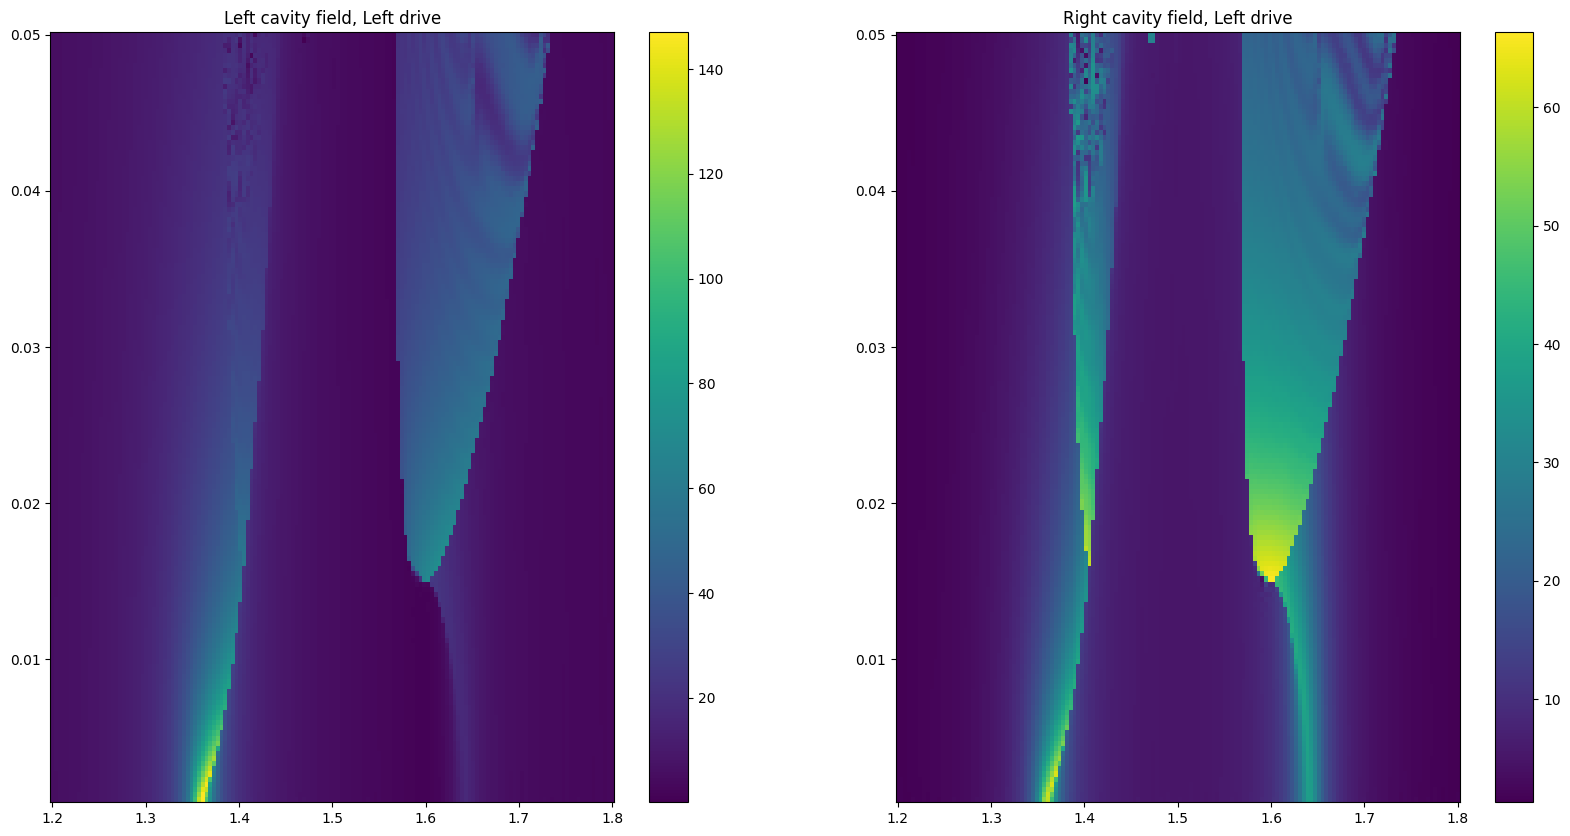

In [47]:
x,y = np.meshgrid(w_p,F, indexing = 'ij')
fig,ax = plt.subplots(ncols =2, figsize = (20,10))
im1 = ax[0].pcolormesh(x,y,np.abs(Z7_ld/F))
ax[0].set_title('Left cavity field, Left drive')
fig.colorbar(im1,ax=ax[0])
im2 = ax[1].pcolormesh(x,y,np.abs(Z8_ld/F))
fig.colorbar(im2,ax=ax[1])
ax[1].set_title('Right cavity field, Left drive')

plt.show()

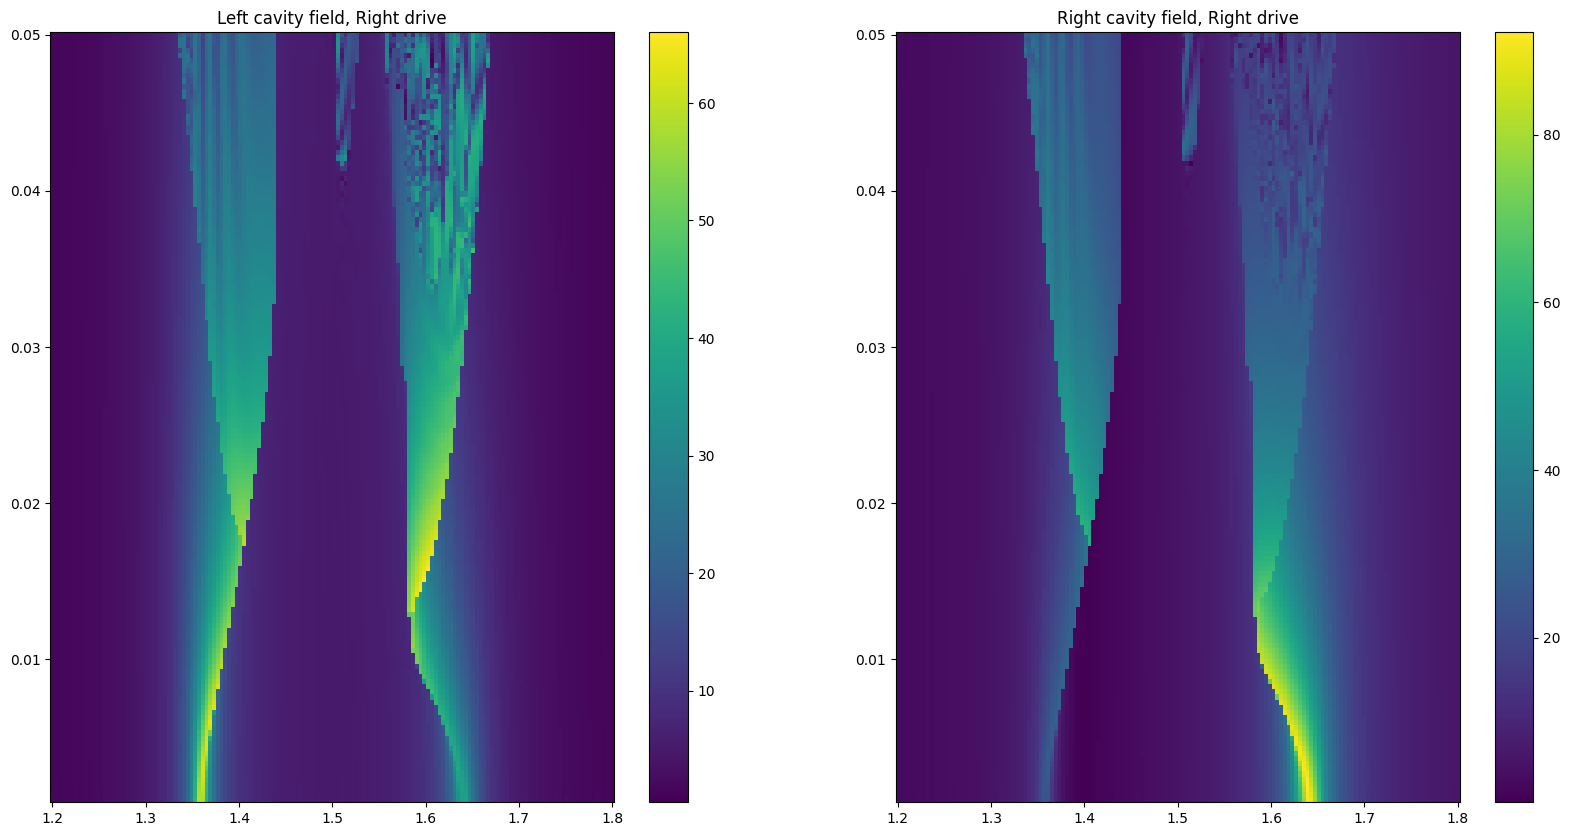

In [48]:
fig,ax = plt.subplots(ncols =2, figsize = (20,10))
im1 = ax[0].pcolormesh(x,y,np.abs(Z7_rd/F))
fig.colorbar(im1,ax=ax[0])
ax[0].set_title('Left cavity field, Right drive')
im2 = ax[1].pcolormesh(x,y,np.abs(Z8_rd/F))
fig.colorbar(im2,ax=ax[1])
ax[1].set_title('Right cavity field, Right drive')
plt.show()

In [ ]:
np.savez('data4.npz', Z7_ld = Z7_ld,  Z8_ld = Z8_ld, Z7_rd = Z7_rd,  Z8_rd = Z8_rd)

### $\omega_l > \omega_r$

In [50]:
#Parameters
w_l = 1.6
w_r = 1.4
w_p = np.linspace(1.2,1.8,npts)
F= 0.0005

#### Cavity fields
On the left the modulus squared of the left and right cavity fields are shown while a drive on the left cavity is applied 

On the right the modulus squared of the left and right cavity fields are shown while a drive on the right cavity is applied

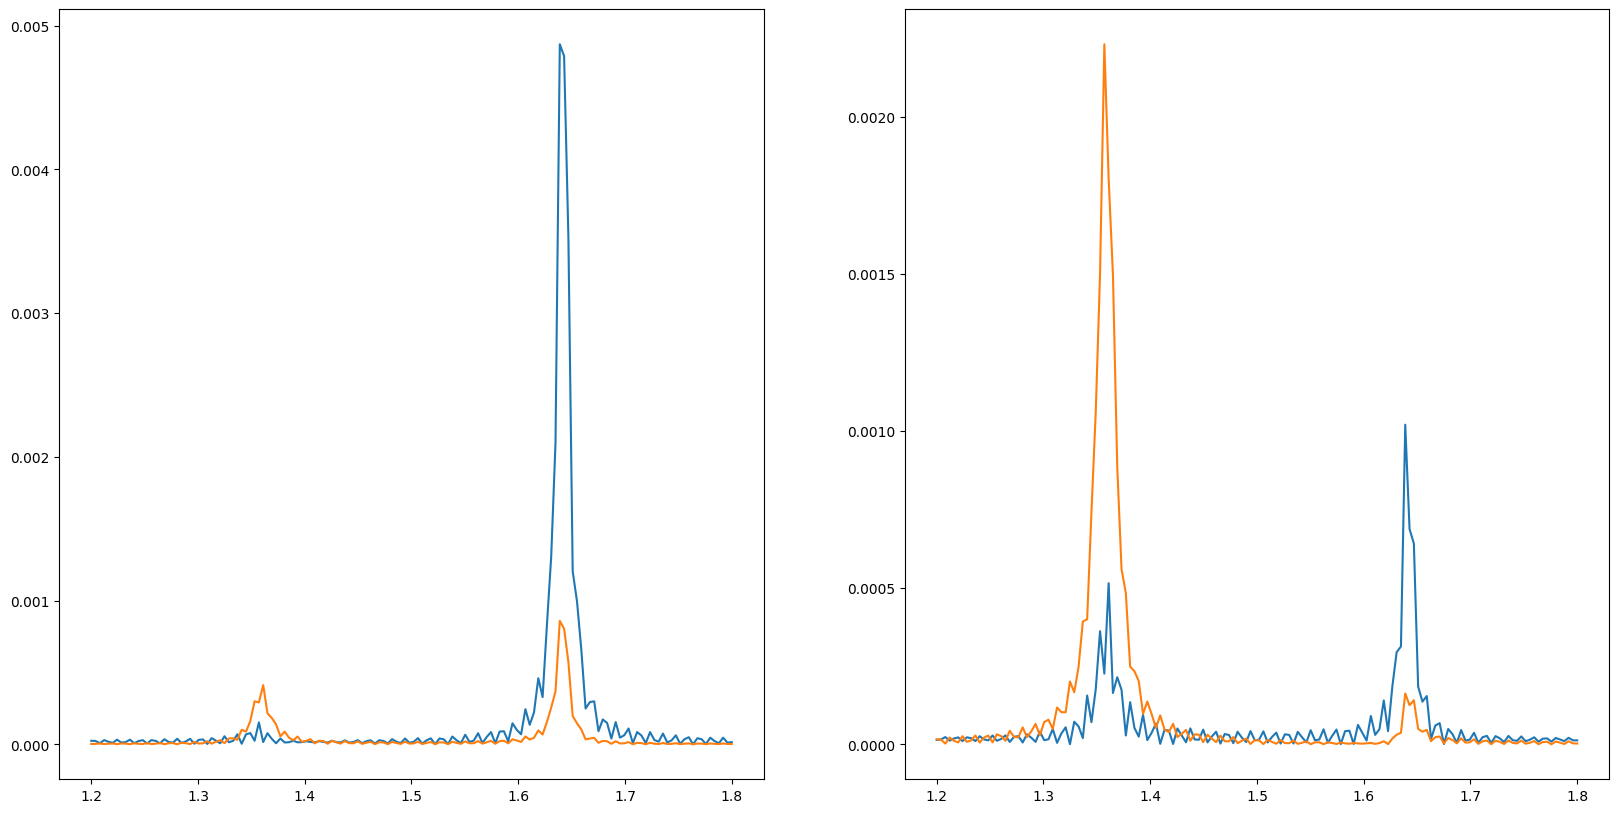

In [51]:
al_l = np.array([])
ar_l = np.array([])
al_r = np.array([])
ar_r = np.array([])

fig, ax = plt.subplots(ncols=2, figsize = (20,10))
for wp in w_p:
    dr = wp-w_r
    dl = wp-w_l
    res_l = solve_ivp(rhs_left, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, F))
    res_r = solve_ivp(rhs_right, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, F))

    al_l = np.append(al_l,res_l.y[0][-1])
    ar_l = np.append(ar_l,res_l.y[1][-1])
    al_r = np.append(al_r,res_r.y[0][-1])
    ar_r = np.append(ar_r,res_r.y[1][-1])
ax[0].plot(w_p,np.abs(al_l)**2)
ax[0].plot(w_p,np.abs(ar_l)**2)
ax[1].plot(w_p,np.abs(al_r)**2)
ax[1].plot(w_p,np.abs(ar_r)**2)
plt.show()

#### Changing the input power 

In [52]:
F = np.linspace(0.001,0.05,npts)

In [52]:
Z9_ld = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z10_ld = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z9_rd = np.ndarray((len(w_p),len(F)), dtype ='complex' )
Z10_rd = np.ndarray((len(w_p),len(F)), dtype ='complex' )
for i, f in enumerate(F):
    
    al_l = np.array([])
    ar_l = np.array([])
    al_r = np.array([])
    ar_r = np.array([])
    
    for wp in w_p:
        dr = wp-w_r
        dl = wp-w_l
        res_l = solve_ivp(rhs_left, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, f))
        res_r = solve_ivp(rhs_right, (0, 1000), [1+ 0.j, 1+0.j], args= (dl, dr,k, g, Ul, Ur, f))

        al_l = np.append(al_l,res_l.y[0][-1])
        ar_l = np.append(ar_l,res_l.y[1][-1])
        al_r = np.append(al_r,res_r.y[0][-1])
        ar_r = np.append(ar_r,res_r.y[1][-1])
    Z9_ld[:,i] = al_l
    Z10_ld[:,i] = ar_l
    Z9_rd[:,i] = al_r
    Z10_rd[:,i] = ar_r

In [53]:
file = np.load('data5.npz', allow_pickle=True)
file.files
Z9_ld = file['Z9_ld']
Z10_ld = file['Z10_ld']
Z9_rd = file['Z9_rd']
Z10_rd = file['Z10_rd']

#### Linecuts

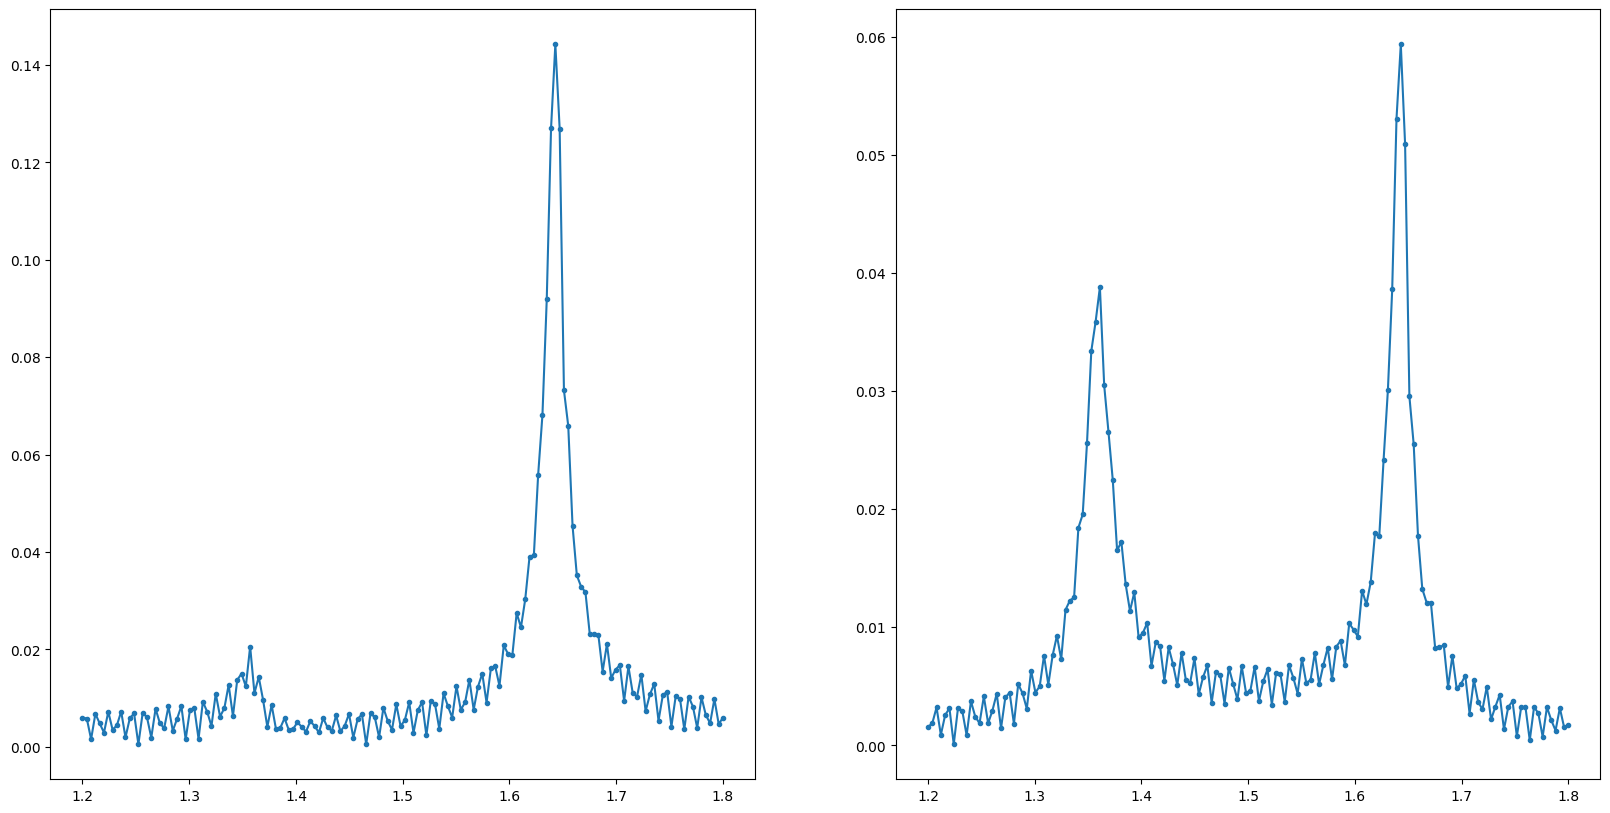

In [54]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
ax[0].plot(w_p,np.abs(Z9_ld[:,0]), '.-')
ax[1].plot(w_p,np.abs(Z10_ld[:,0]), '.-')
plt.show()

#### 2D plots

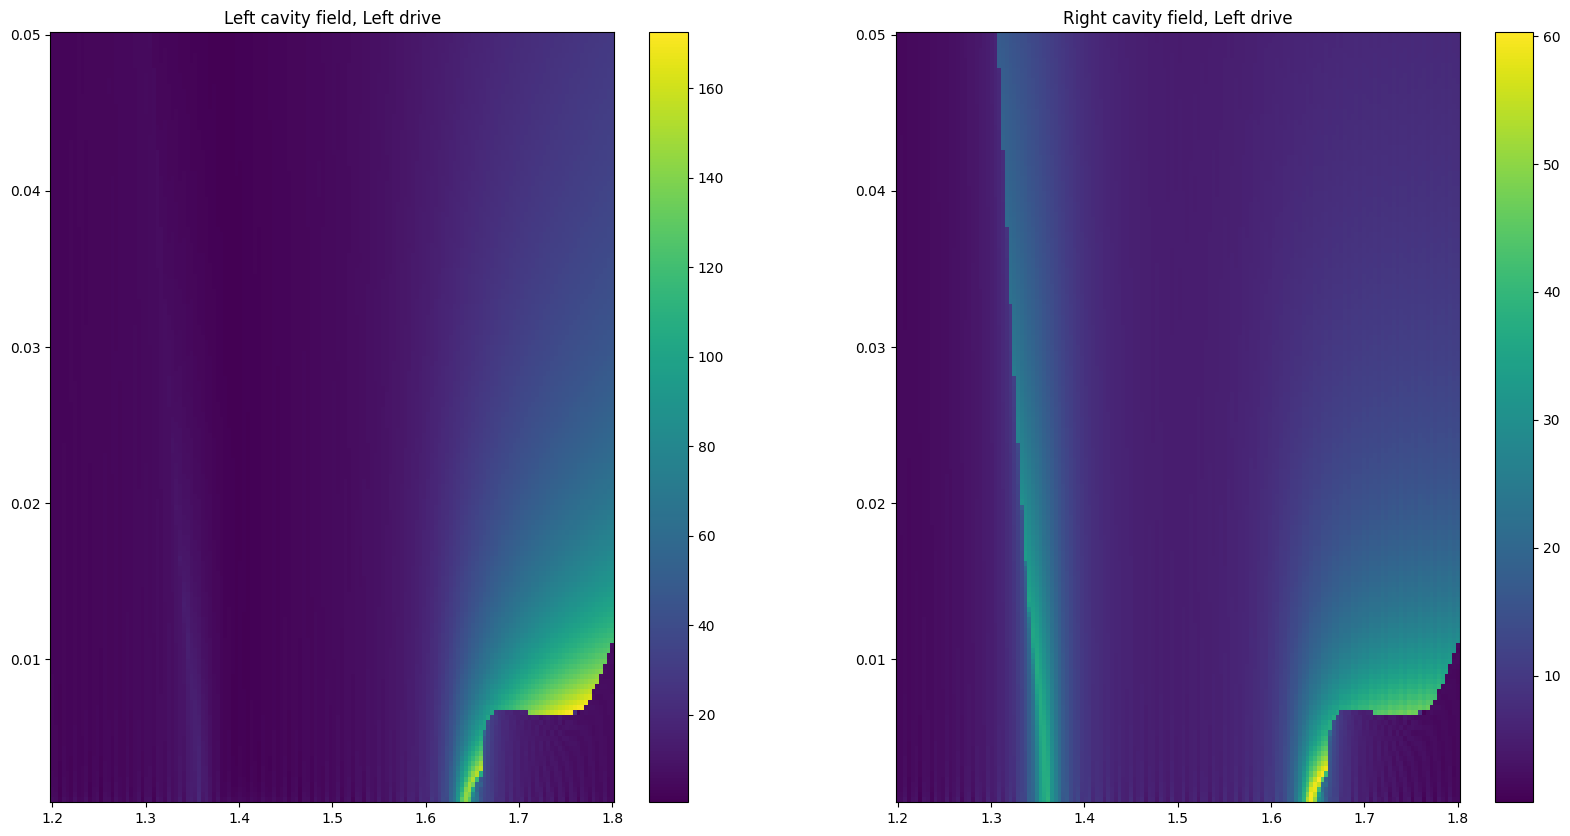

In [55]:
x,y = np.meshgrid(w_p,F, indexing = 'ij')
fig,ax = plt.subplots(ncols =2, figsize = (20,10))
im1 = ax[0].pcolormesh(x,y,np.abs(Z9_ld/F))
ax[0].set_title('Left cavity field, Left drive')
fig.colorbar(im1,ax=ax[0])
im2 = ax[1].pcolormesh(x,y,np.abs(Z10_ld/F))
fig.colorbar(im2,ax=ax[1])
ax[1].set_title('Right cavity field, Left drive')

plt.show()

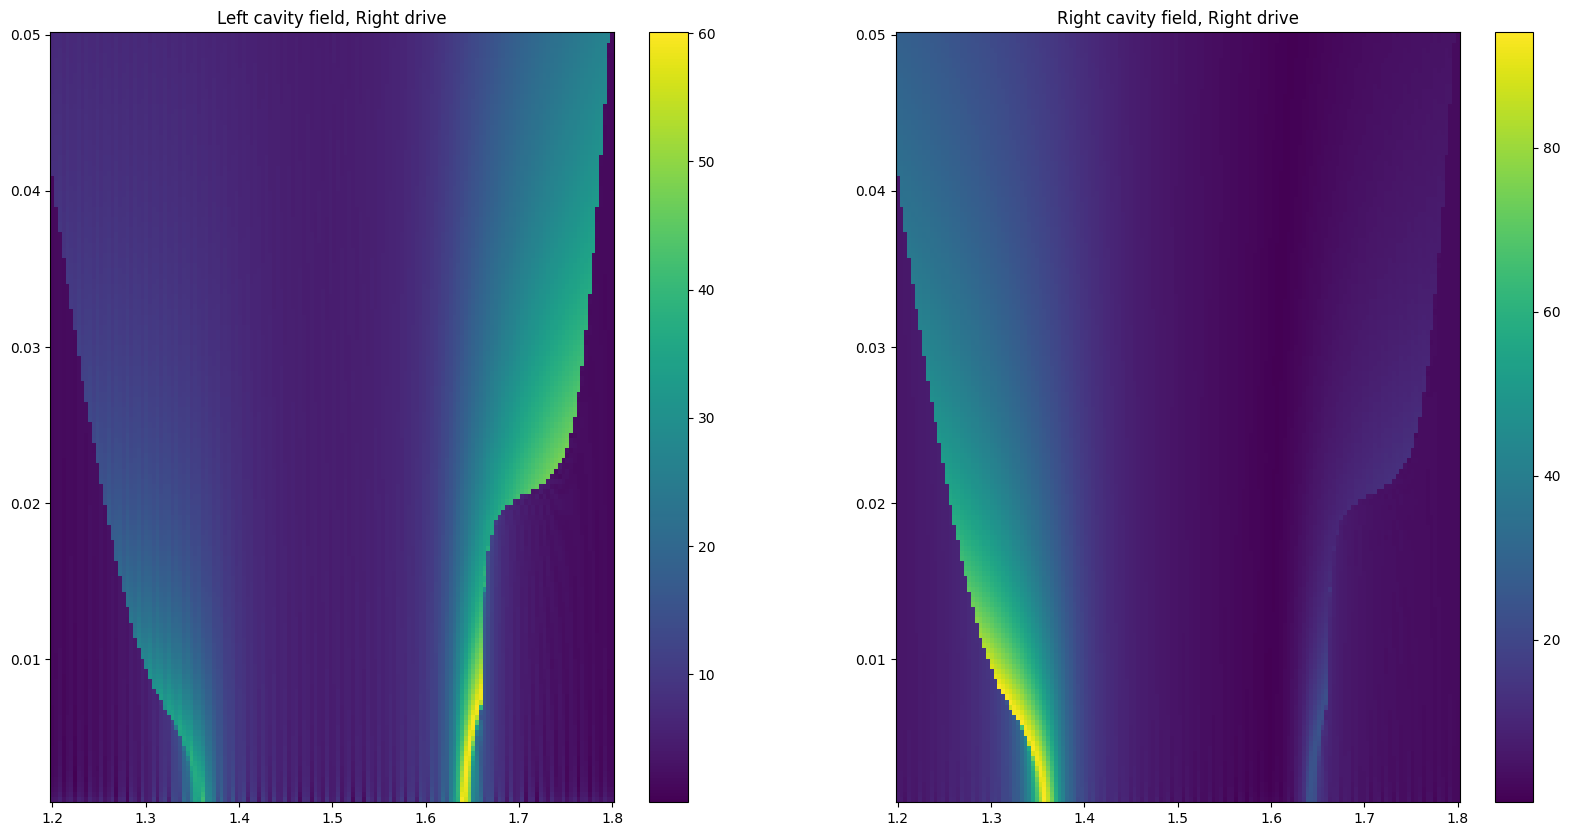

In [56]:
fig,ax = plt.subplots(ncols =2, figsize = (20,10))
im1 = ax[0].pcolormesh(x,y,np.abs(Z9_rd/F))
fig.colorbar(im1,ax=ax[0])
ax[0].set_title('Left cavity field, Right drive')
im2 = ax[1].pcolormesh(x,y,np.abs(Z10_rd/F))
fig.colorbar(im2,ax=ax[1])
ax[1].set_title('Right cavity field, Right drive')
plt.show()

In [ ]:
np.savez('data5.npz', Z9_ld = Z9_ld,  Z10_ld = Z10_ld, Z9_rd = Z1_rd,  Z2_rd = Z2_rd)

# Asymptotic behaviour

In [56]:
w_l = 1.5
w_r = 1.5
w_p = np.linspace(1.2,1.8,200)
k = 0.01
g = 0.02
J = 0.1
Ul = 0
Ur = 0
F = 0.0005

In [60]:
A = 1j*np.array([[dl + 0.5*1j*k,-J],[-J,dr+ 0.5*1j*g]])

In [62]:
print(np.array_repr(A))

array([[-0.005+0.2j, -0.   -0.1j],
       [-0.   -0.1j, -0.01 +0.4j]])


In [63]:
w,v = np.linalg.eig(A)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

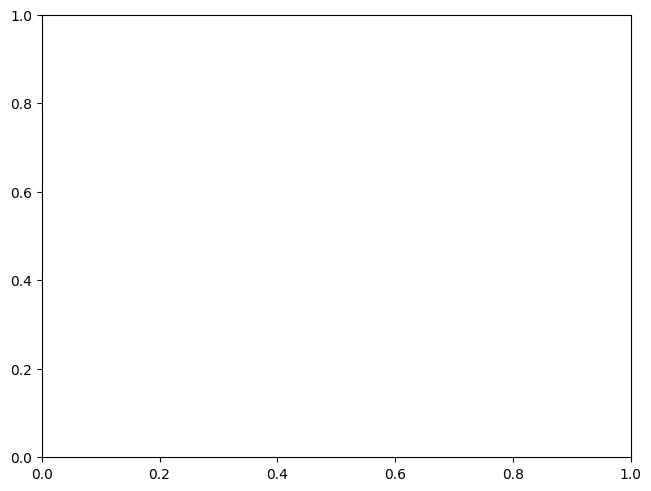

In [57]:
plt.subplots( constrained_layout=True )